## Источник данных

В проекте используются данные, представляющие ежегодное исследование на [Stack Overflow](https://survey.stackoverflow.co/) за 2024 год.

## Необходимые библиотеки

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## I. Основная информация

In [161]:
info_df = pd.read_csv('data/survey_results_public_2024.csv',
                     usecols=['Country',
                              'MainBranch', 
                              'Age', 
                              'CodingActivities',
                              'Industry'])

info_df

,MainBranch,Age,CodingActivities,Country,Industry
0,I am a developer by profession,Under 18 years old,Hobby,United States of America,NaN
1,I am a developer by profession,35-44 years old,Hobby;Contribute to open-source projects;Other...,United Kingdom of Great Britain and Northern I...,NaN
2,I am a developer by profession,45-54 years old,Hobby;Contribute to open-source projects;Other...,United Kingdom of Great Britain and Northern I...,NaN
3,I am learning to code,18-24 years old,NaN,Canada,NaN
4,I am a developer by profession,18-24 years old,NaN,Norway,NaN
...,...,...,...,...,...
65432,I am a developer by profession,18-24 years old,Hobby;School or academic work,NaN,NaN
65433,I am a developer by profession,25-34 years old,Hobby;Contribute to open-source projects,NaN,NaN
65434,I am a developer by profession,25-34 years old,Hobby,NaN,NaN
65435,I am a developer by profession,18-24 years old,Hobby;Contribute to open-source projects;Profe...,Germany,NaN


### 1. Какого возраста были респонденты, участвующие в опросе Stack Overflow

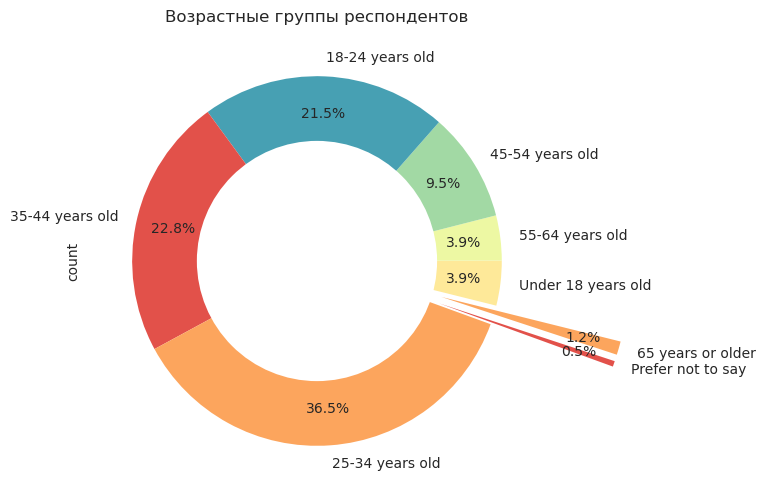

In [162]:
with plt.style.context('seaborn-v0_8-white'):
    p = (
        info_df['Age']
        .value_counts()
        .sort_values()
        .plot.pie(figsize=(6, 6),
                  autopct='%0.1f%%',
                  explode=(0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
                  startangle=340,
                  colors=sns.color_palette('Spectral'),
                  # move the percentage inside the arcs
                  pctdistance=0.80,
                  )
    )

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Возрастные группы респондентов')

f = p.get_figure()
plt.show()

Возрастная группа **25-34 years old** оказалась самой популярной среди программистов и составила более **36%**.<br>Ниаменьшей по численности оказалась группа **65 years or older** и составила чуть больше **1%**.

### 2. Сколько среди респондентов было действующих разработчиков (разработчик - тот, кто пишет код)?

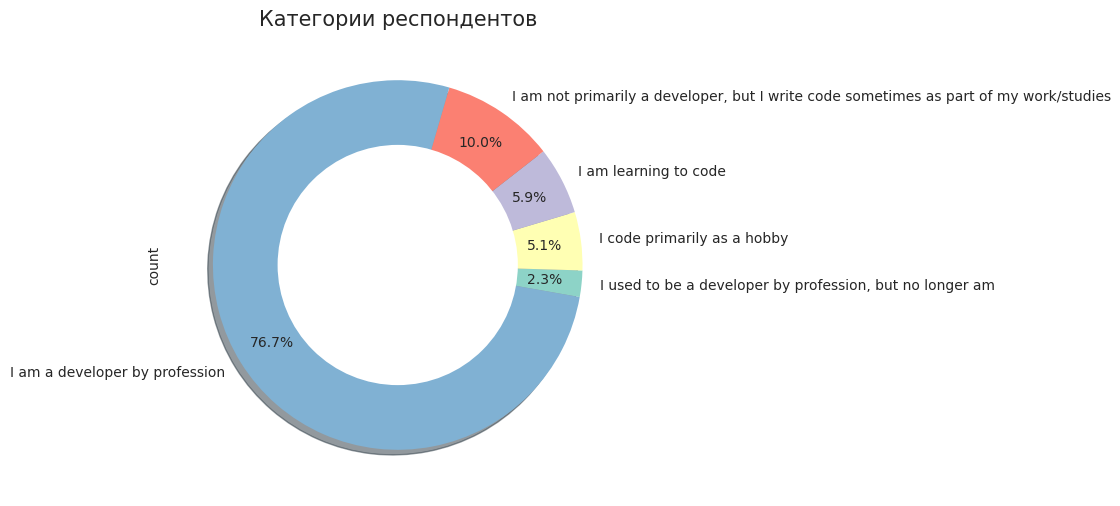

In [163]:
with plt.style.context('seaborn-v0_8-white'):
    p = (
        info_df['MainBranch']
        .value_counts()
        .sort_values()
        .plot.pie(figsize=(6, 6),
                  autopct='%0.1f%%',
                  startangle=350,
                  colors=sns.color_palette('Set3'),
                  pctdistance=0.80,
                  shadow=True
                  )
    )

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Категории респондентов', fontsize=15)

f = p.get_figure()
plt.show()

Подавляющее число респонденотов, более **76%**, были действующими разработчиками.

### 3. В каких отраслях работали программисты?

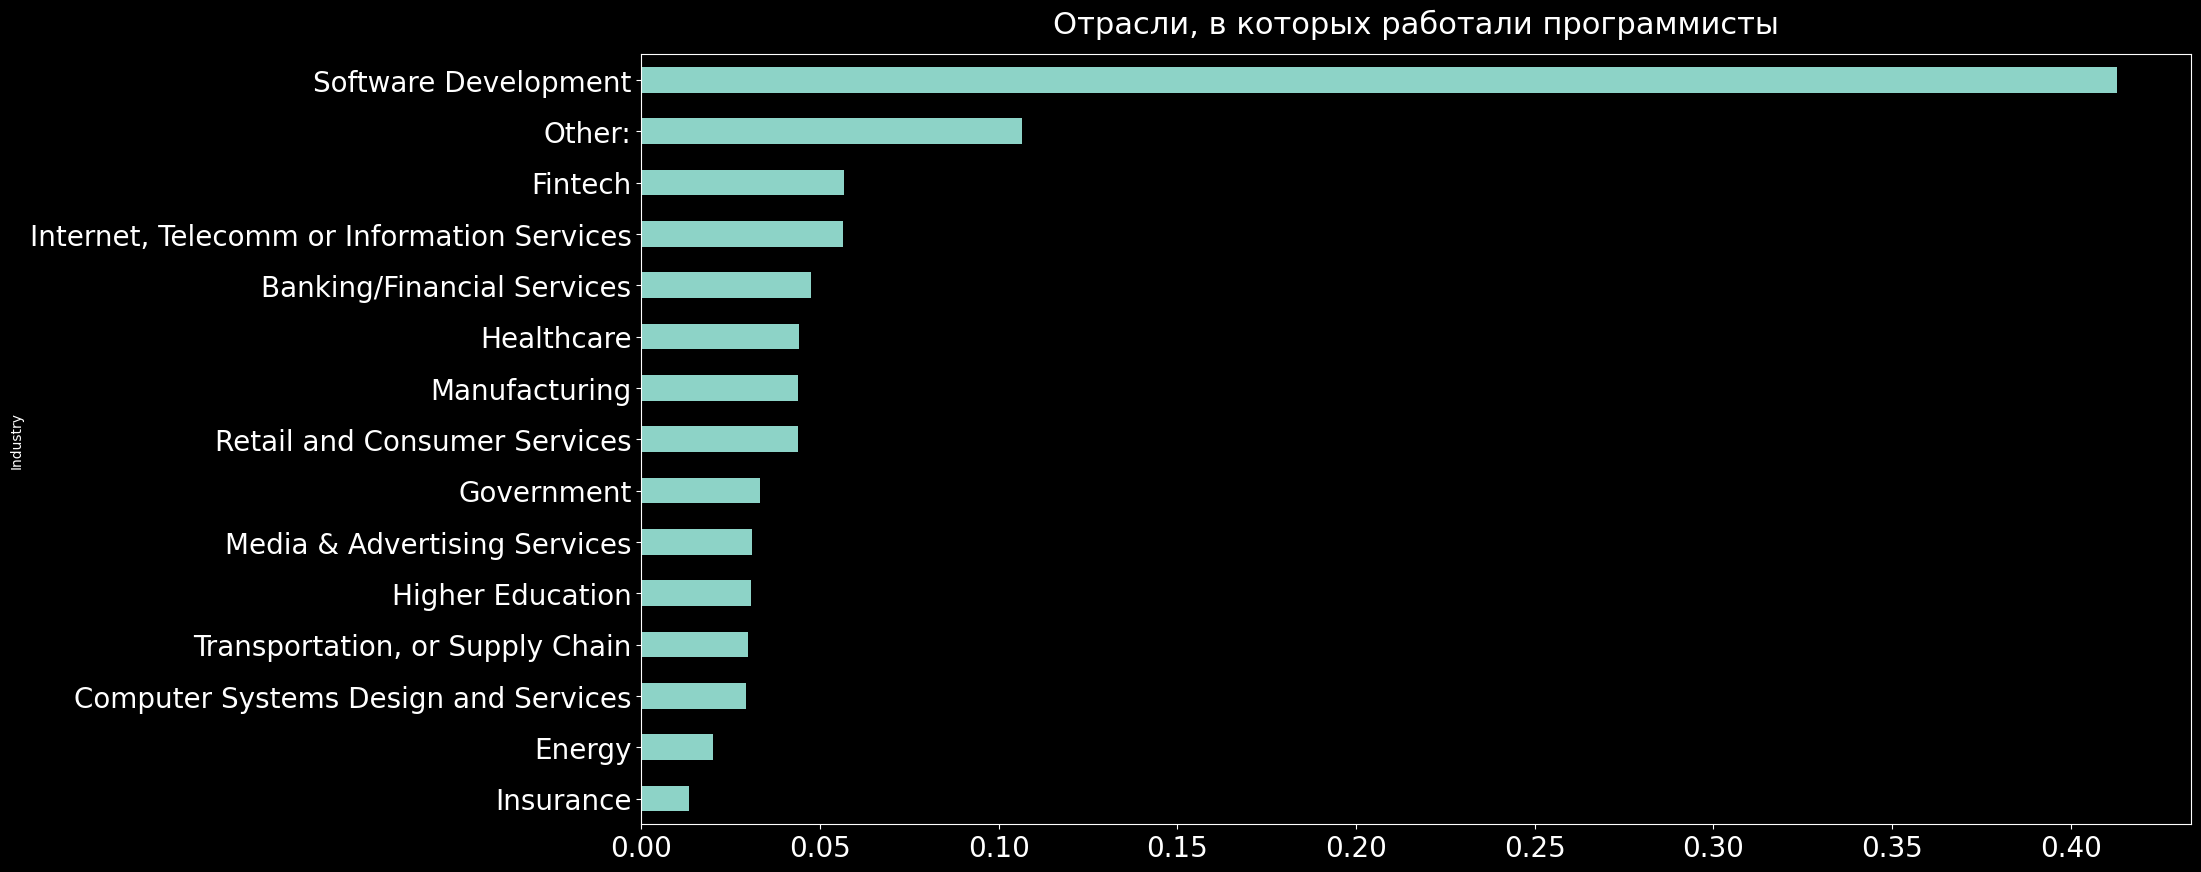

In [164]:
with plt.style.context('dark_background'):
    p = (
        info_df['Industry']
        .value_counts(normalize=True)
        .sort_values()
        .plot.barh(figsize=(20, 10),
                   fontsize=20)
            
        )

plt.title('Отрасли, в которых работали программисты', 
          fontsize=22, 
          pad=15)

f = p.get_figure() 
plt.show()

Более **40%** программистов работали в компаниях, занимающихся разработкой программного обеспечения (**Software Development**).<br>В остальных отраслях было задействовано от **1% до 5%** программистов. 

### 4. Из какой страны было больше всего разработчиков, которые кроме основной работы, дополнительно участвовали в проектах с открытым исходным кодом?

In [165]:
# Удалим строки, содержащие NaN в столбце CodingActivities
info_df_copy = info_df.copy()

info_df_copy = (
    info_df_copy.dropna(subset='CodingActivities')
)
info_df_copy.shape

(54466, 5)

In [166]:
# Найдем строки, в которых в столбце CodingActivities содержится среди прочих Contribute to open-source projects
(
    info_df_copy
    .loc[info_df_copy['CodingActivities'].str.contains('Contribute to open-source projects')]
    .groupby('Country')['CodingActivities']
    .count()
    .sort_values(ascending=False)
    .head()
)

Country
United States of America                                2563
Germany                                                 1364
India                                                    916
United Kingdom of Great Britain and Northern Ireland     652
France                                                   518
Name: CodingActivities, dtype: int64

Больше всего разработчиков, участвовавших в проектах с открытым исходным кодом было из **США** - более **2500** человек.

## II. Образование - работа - карьера

In [167]:
lang_df = pd.read_csv('data/survey_results_public_2024.csv',
                usecols=['LanguageHaveWorkedWith', 
                         'LanguageWantToWorkWith', 
                         'Country'])
lang_df.head(20)

,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,United States of America,NaN,NaN
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,United Kingdom of Great Britain and Northern I...,C#,C#
3,Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python
5,United States of America,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
6,United States of America,R,R
7,Uzbekistan,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript
8,United Kingdom of Great Britain and Northern I...,Lua,Lua
9,Serbia,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript


### 1. Какие языки программирования использовали в своей работе разработчики?

In [168]:
# Количество языков программирования,представленных в 2024 году
(
    lang_df['LanguageHaveWorkedWith']
    .str.split(';')
    .explode()
    .value_counts()
    .shape[0]
)

49

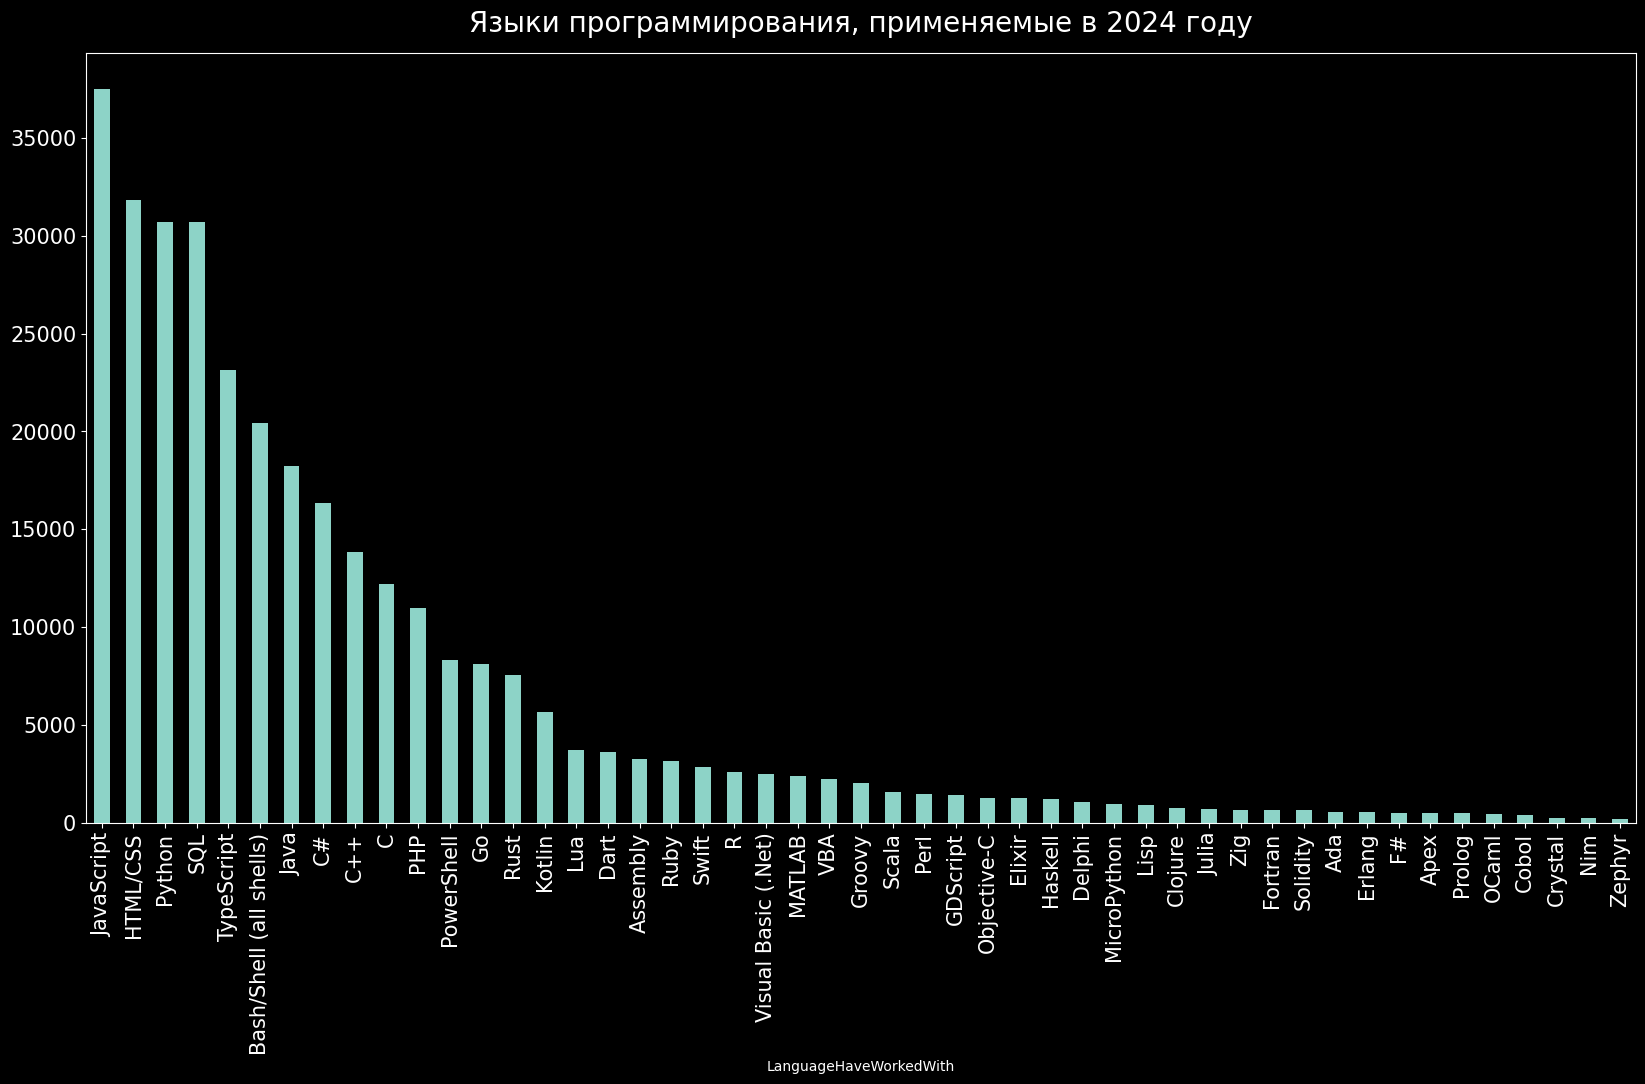

In [169]:
with plt.style.context('dark_background'):
    p = (
        lang_df['LanguageHaveWorkedWith']
        .str.split(';')
        .explode()
        .value_counts()
        .plot.bar(figsize=(20, 10), fontsize=15)
            
        )

plt.title('Языки программирования, применяемые в 2024 году', 
          fontsize=20, 
          pad=15)

f = p.get_figure() 
plt.show()

Всего было представлено **49** языков.<br>Самым популярным языком был **JavaScript**.<br>Самым непопулярным языком оказался **Zephyr**.

### 2. Топ-10 самых популярных языков программирования в 2024 году

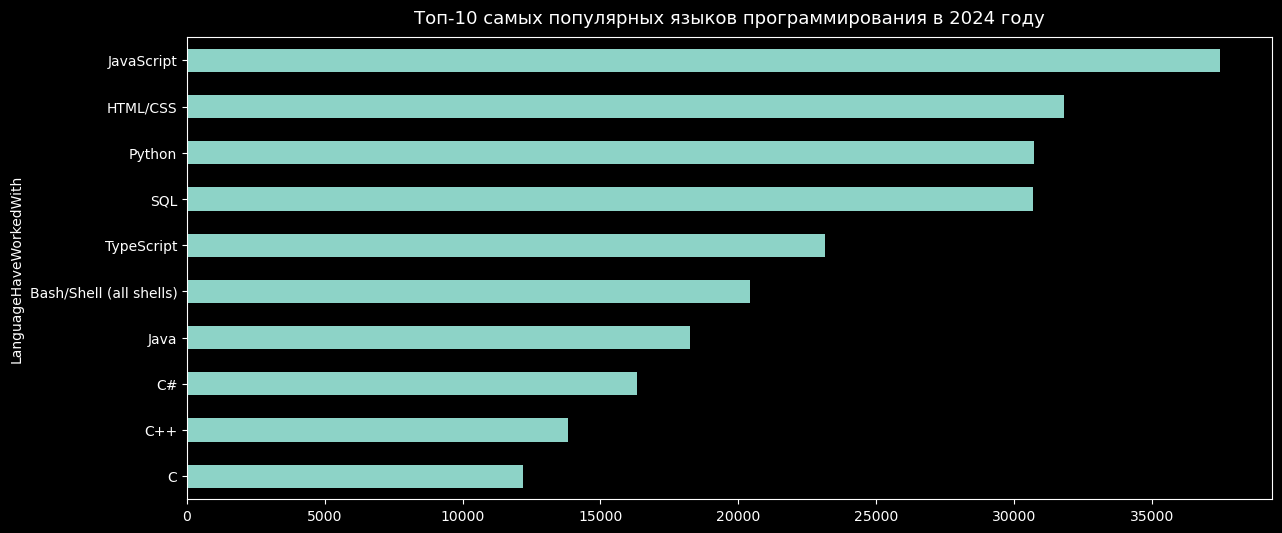

In [170]:
with plt.style.context('dark_background'):
    p = (
        lang_df['LanguageHaveWorkedWith']
        .str.split(';')
        .explode()
        .value_counts()
        .head(10)
        .sort_values()
        .plot.barh(figsize=(14, 6))
    )
plt.title('Топ-10 самых популярных языков программирования в 2024 году', 
          fontsize=13,
          pad=10)

f = p.get_figure()
plt.show()

### С какими языками из топ-10 программисты работали, но НЕ ХОТЕЛИ бы работать в будущем?

In [171]:
# 1. Топ-10 языков, с которыми программисты работали
have_worked_with = (
    lang_df['LanguageHaveWorkedWith']
    .str.split(';')
    .explode()
    .value_counts()
    .head(10)
    .index
)
have_worked_with

Index(['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'TypeScript',
       'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'C'],
      dtype='object', name='LanguageHaveWorkedWith')

In [172]:
# 2. Топ-10 языков, с которыми программисты хотели бы работать в будущем
want_to_work_with = (
    lang_df['LanguageWantToWorkWith']
    .str.split(';')
    .explode()
    .value_counts()
    .head(10)
    .index
)
want_to_work_with

Index(['Python', 'JavaScript', 'SQL', 'HTML/CSS', 'TypeScript', 'Rust', 'Go',
       'Bash/Shell (all shells)', 'C#', 'C++'],
      dtype='object', name='LanguageWantToWorkWith')

In [173]:
# 3. Языки из Топ-10, с которыми программисты не хотели бы работать в будущем
have_worked_with[~have_worked_with.isin(want_to_work_with)]

Index(['Java', 'C'], dtype='object', name='LanguageHaveWorkedWith')

Большинству программистов не хотелось бы работать с **Java** и **C** в будущем, несмотря на их популярность в 2024 году.

### 4. Сколько в среднем языков программирования разработчик использовал в своей работе?

In [174]:
(
    lang_df['LanguageHaveWorkedWith']
    .str.split(';')
    .str.len().mean()
    
)

5.393472257092644

В среднем, программист одновременно работал с **5** языками.

### 5. Какие были самые популярные языки программирования по странам в 2024 году?

In [175]:
# 1. Определим все языки и получим объект Series
all_languages = (
    lang_df['LanguageHaveWorkedWith']
    .str.split(';')
    .explode()
)

In [176]:
# 2. Объединим датафрейм lang_df (используем столбец Country) и объект Series all_languages. 
# Далее сгруппируем по городам и применим метод mode для получения наиболее часто встречаемого значения
languages_by_country = (
                        lang_df[['Country']]
                        .join(all_languages)
                        .groupby('Country')
                        .agg(pd.Series.mode)
)
languages_by_country.head(10)

,LanguageHaveWorkedWith
Country,
Afghanistan,"[JavaScript, Python]"
Albania,SQL
Algeria,JavaScript
Andorra,"[Python, SQL]"
Angola,JavaScript
Antigua and Barbuda,"[HTML/CSS, JavaScript, SQL]"
Argentina,JavaScript
Armenia,JavaScript
Australia,JavaScript


### 6. Какой язык был самым популярным в России в 2024 году?

In [177]:
languages_by_country.loc['Russian Federation']['LanguageHaveWorkedWith']

'Python'

**Python** был самым популярным языком программирования в Росии в 2024 году.

### 7. Какой процент программистов из разных стран знали язык Python?

In [178]:
# Определим, сколько всего было разработчиков по странам
num_devs_by_country = (
    lang_df['Country'].value_counts()
)
num_devs_by_country.head()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
Name: count, dtype: int64

In [179]:
# Определим, сколько разработчиков из разных стран знали Python
know_python = (
    lang_df.groupby('Country')['LanguageHaveWorkedWith']
    .apply(lambda x: x.str.contains('Python').sum())
)
know_python.head()

Country
Afghanistan    26
Albania        10
Algeria        37
Andorra         8
Angola          9
Name: LanguageHaveWorkedWith, dtype: int64

In [180]:
# Обеъдиним know_python и num_devs_by_country
python_df = (pd
             .concat([num_devs_by_country, know_python], axis=1)
             .rename(columns={'count': 'NumDevs', 'LanguageHaveWorkedWith': 'NumKnowsPython'})
)

python_df.head(20)

,NumDevs,NumKnowsPython
Country,,
United States of America,11095,6251
Germany,4947,2647
India,4231,2128
United Kingdom of Great Britain and Northern Ireland,3224,1638
Ukraine,2672,963
France,2110,1187
Canada,2104,1120
Poland,1534,783
Netherlands,1449,700


In [181]:
# Создадим новый столбец PCTKnowsPython
python_df['PCTKnowsPython'] = (python_df['NumKnowsPython'] / python_df['NumDevs']) * 100
python_df.head(20)

,NumDevs,NumKnowsPython,PCTKnowsPython
Country,,,
United States of America,11095,6251,56.340694
Germany,4947,2647,53.507176
India,4231,2128,50.295438
United Kingdom of Great Britain and Northern Ireland,3224,1638,50.806452
Ukraine,2672,963,36.040419
France,2110,1187,56.255924
Canada,2104,1120,53.231939
Poland,1534,783,51.043025
Netherlands,1449,700,48.309179


### 8. Сколько разработчиков было из России и какой процент из них знал язык Python?

In [182]:
python_df.loc['Russian Federation']

NumDevs           925.000000
NumKnowsPython    485.000000
PCTKnowsPython     52.432432
Name: Russian Federation, dtype: float64

Всего из России участвовало **925** программистов. Больше половины из них (**52%**) знали язык Python.

### 9. Какие профессии (DevType) были представлены в 2024 году?

In [183]:
work_df = pd.read_csv('data/survey_results_public_2024.csv',
                usecols=['Country',
                         'EdLevel', 
                         'LearnCode', 
                         'LearnCodeOnline', 
                         'YearsCode', 
                         'YearsCodePro', 
                         'DevType',
                         'ConvertedCompYearly'])
work_df

,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,Country,ConvertedCompYearly
0,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,United States of America,NaN
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,20,17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,37,27,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN
3,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,4,NaN,"Developer, full-stack",Canada,NaN
4,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,NaN,"Developer, full-stack",Norway,NaN
...,...,...,...,...,...,...,...,...
65432,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,5,3,Blockchain,NaN,NaN
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,9,5,"Developer, mobile",NaN,NaN
65435,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,5,2,"Developer, back-end",Germany,NaN


In [184]:
dev_type = (
        work_df['DevType']
        .value_counts()
        #.apply(lambda x: f'{x:,.2f}')
    
)
dev_type

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

### 10. Какая была средняя зарплата для разных профессий за 2024 год?

In [185]:
dev_salary = (
        work_df
        .groupby('DevType')['ConvertedCompYearly'].mean()
        .sort_values(ascending=False)
        #.apply(lambda x: f'{x:,.2f}')
)
dev_salary

DevType
Hardware Engineer                                233049.261538
Senior Executive (C-Suite, VP, etc.)             230558.104235
Project manager                                  213003.827869
Developer Experience                             162155.011364
Blockchain                                       148709.387097
Engineering manager                              139142.571165
Developer Advocate                               130927.865385
Cloud infrastructure engineer                    120770.461538
Engineer, site reliability                       117476.240310
Security professional                            104525.362832
Other (please specify):                          101647.721966
Data scientist or machine learning specialist     98510.299771
Developer, AI                                     95362.671795
Data engineer                                     93599.825561
Product manager                                   92582.988506
Research & Development role                    

In [186]:
# Объединим dev_type и dev_salary в датафрейм devs_df 
# и посмотрим наличие корреляции между типом профессии и уровнем зарплаты

dev_df = (
    pd
    .concat([dev_type, dev_salary], axis=1)
    .rename(columns={'count': 'OccupationFreq', 'ConvertedCompYearly': 'AnnualSalary, USD'})
)
dev_df.corr()

,OccupationFreq,"AnnualSalary, USD"
OccupationFreq,1.000000,-0.218951
"AnnualSalary, USD",-0.218951,1.000000


Между типом профессии и уровнем зарплаты есть **слабая отрицательная** корреляция.
Можно предположить, что в более популярных профессиях зарплата ниже, чем в менее популярных профессиях.

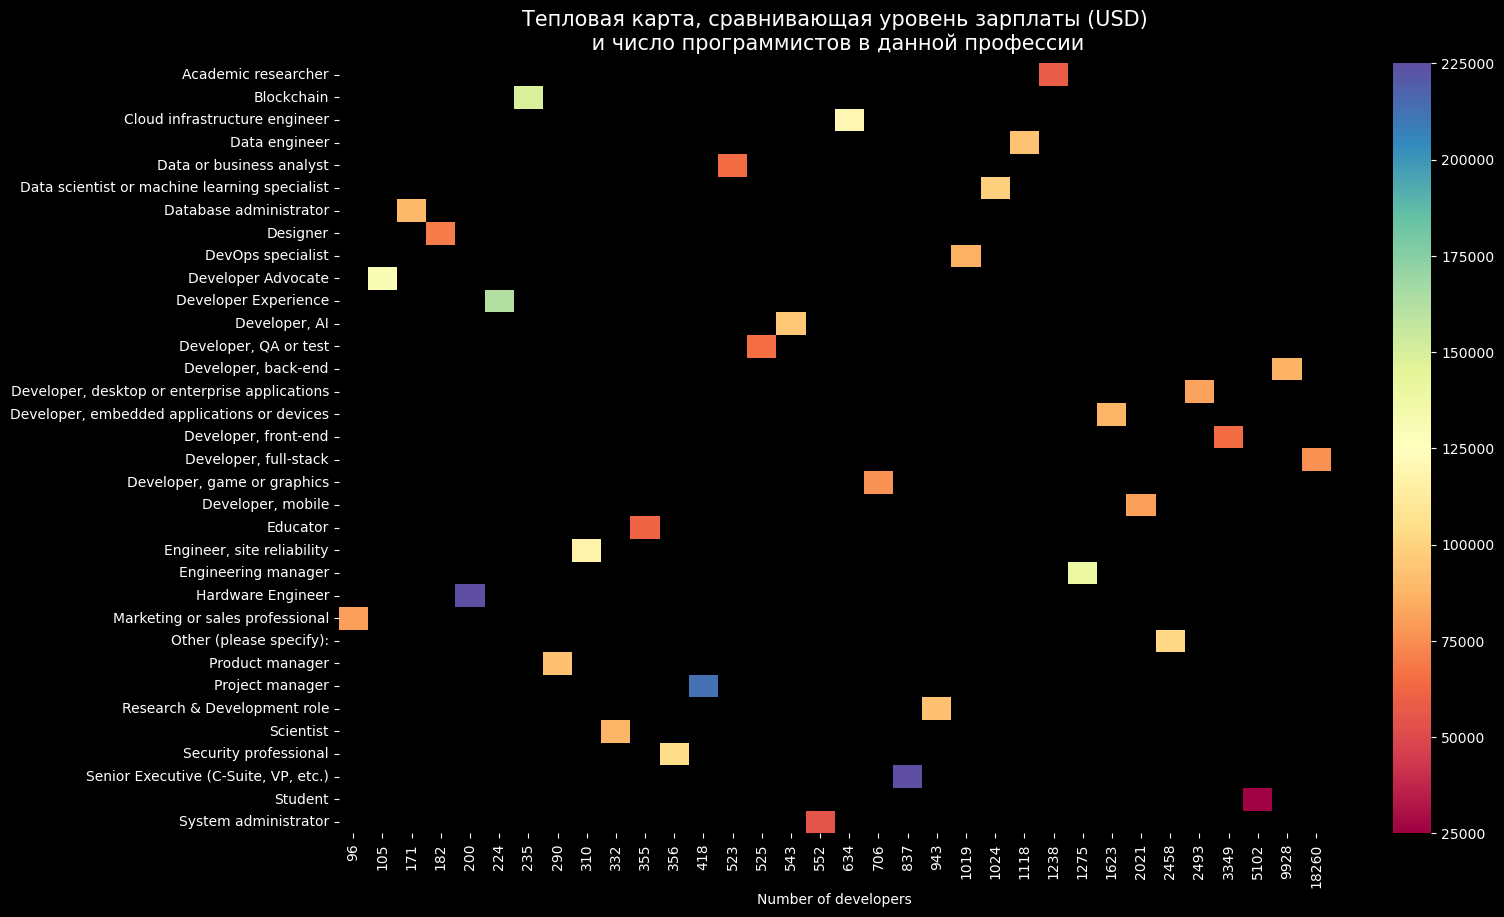

In [257]:
# Отобразим данные на тепловой карте 
pivot_dev = dev_df.pivot_table(index="DevType", columns="OccupationFreq", values="AnnualSalary, USD")

with plt.style.context('dark_background'):
    plt.figure(figsize = (16, 10))
    ax = sns.heatmap(pivot_dev, 
                     cmap="Spectral", 
                     vmin=25000, 
                     vmax=225000) 
                    #linewidths=0.005, 
                    #linecolor='white')

ax.set(xlabel="Number of developers", ylabel="")

plt.title('Тепловая карта, сравнивающая уровень зарплаты (USD)\n и число программистов в данной профессии',
          fontsize=15, 
          pad=10)
plt.show()

### 11. Как уровень образования программиста повлиял на его зарплату?

In [188]:
# Определим какой уровень образования был у разработчиков
edu_level = (
    work_df['EdLevel']
    .value_counts()              
)
edu_level

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [189]:
# Определим средний уровень зарплаты программистов в зависимости от уровня образования
salary_edu = (
        work_df
        .groupby('EdLevel')['ConvertedCompYearly'].mean()
        .sort_values(ascending=False)
)
salary_edu

EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        128351.152381
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           88477.182151
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        85725.929586
Some college/university study without earning a degree                                 78914.449338
Associate degree (A.A., A.S., etc.)                                                    75964.554667
Something else                                                                         68315.435407
Primary/elementary school                                                              65733.578231
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     56389.470886
Name: ConvertedCompYearly, dtype: float64

In [190]:
# Объединим edu_level и salary_edu в датафрейм
edu_and_salary = pd.concat([edu_level, salary_edu], axis=1)
edu_and_salary

,count,ConvertedCompYearly
EdLevel,,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942,88477.182151
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557,85725.929586
Some college/university study without earning a degree,7651,78914.449338
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5793,56389.470886
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970,128351.152381
"Associate degree (A.A., A.S., etc.)",1793,75964.554667
Primary/elementary school,1146,65733.578231
Something else,932,68315.435407


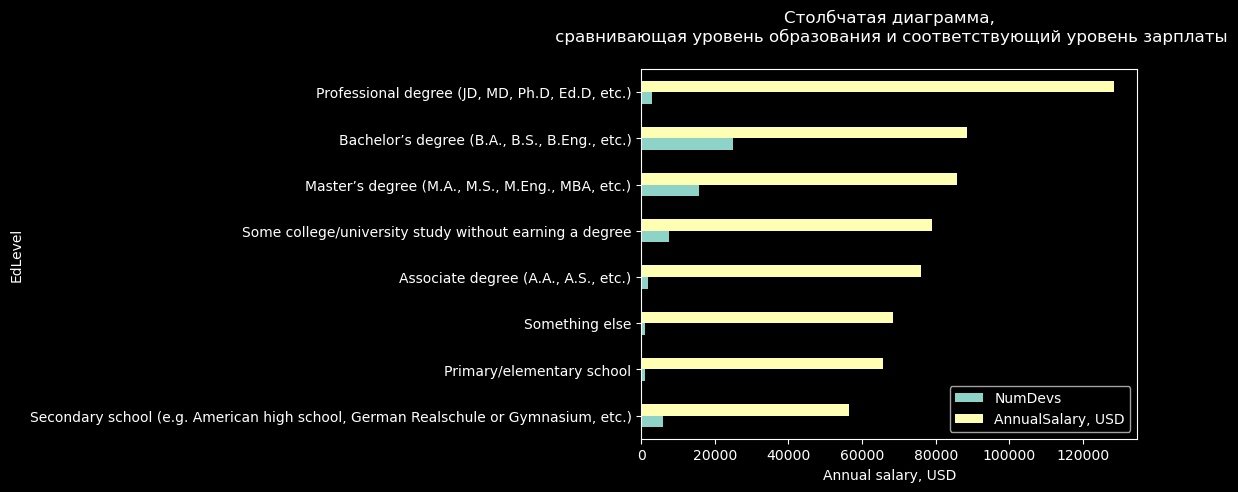

In [191]:
with plt.style.context('dark_background'):
    p = (edu_and_salary
         .rename(columns={'count': 'NumDevs', 'ConvertedCompYearly': 'AnnualSalary, USD'})
         .sort_values(by='AnnualSalary, USD')
         .plot.barh()
    )

plt.title('Столбчатая диаграмма,\n сравнивающая уровень образования и соответствующий уровень зарплаты', 
          fontsize=12,
          pad=20)
plt.xlabel('Annual salary, USD')

f = p.get_figure()
plt.show()

Самыми высокооплачиваемыми специалистами (с зарплатой больше **$120000** в год) оказались программисты с **профессиональной (ученой) степенью**. Но таких программистов было чуть меньше **5%**.<br>

### 12. Какие ресурсы помогли программистам научиться писать код?

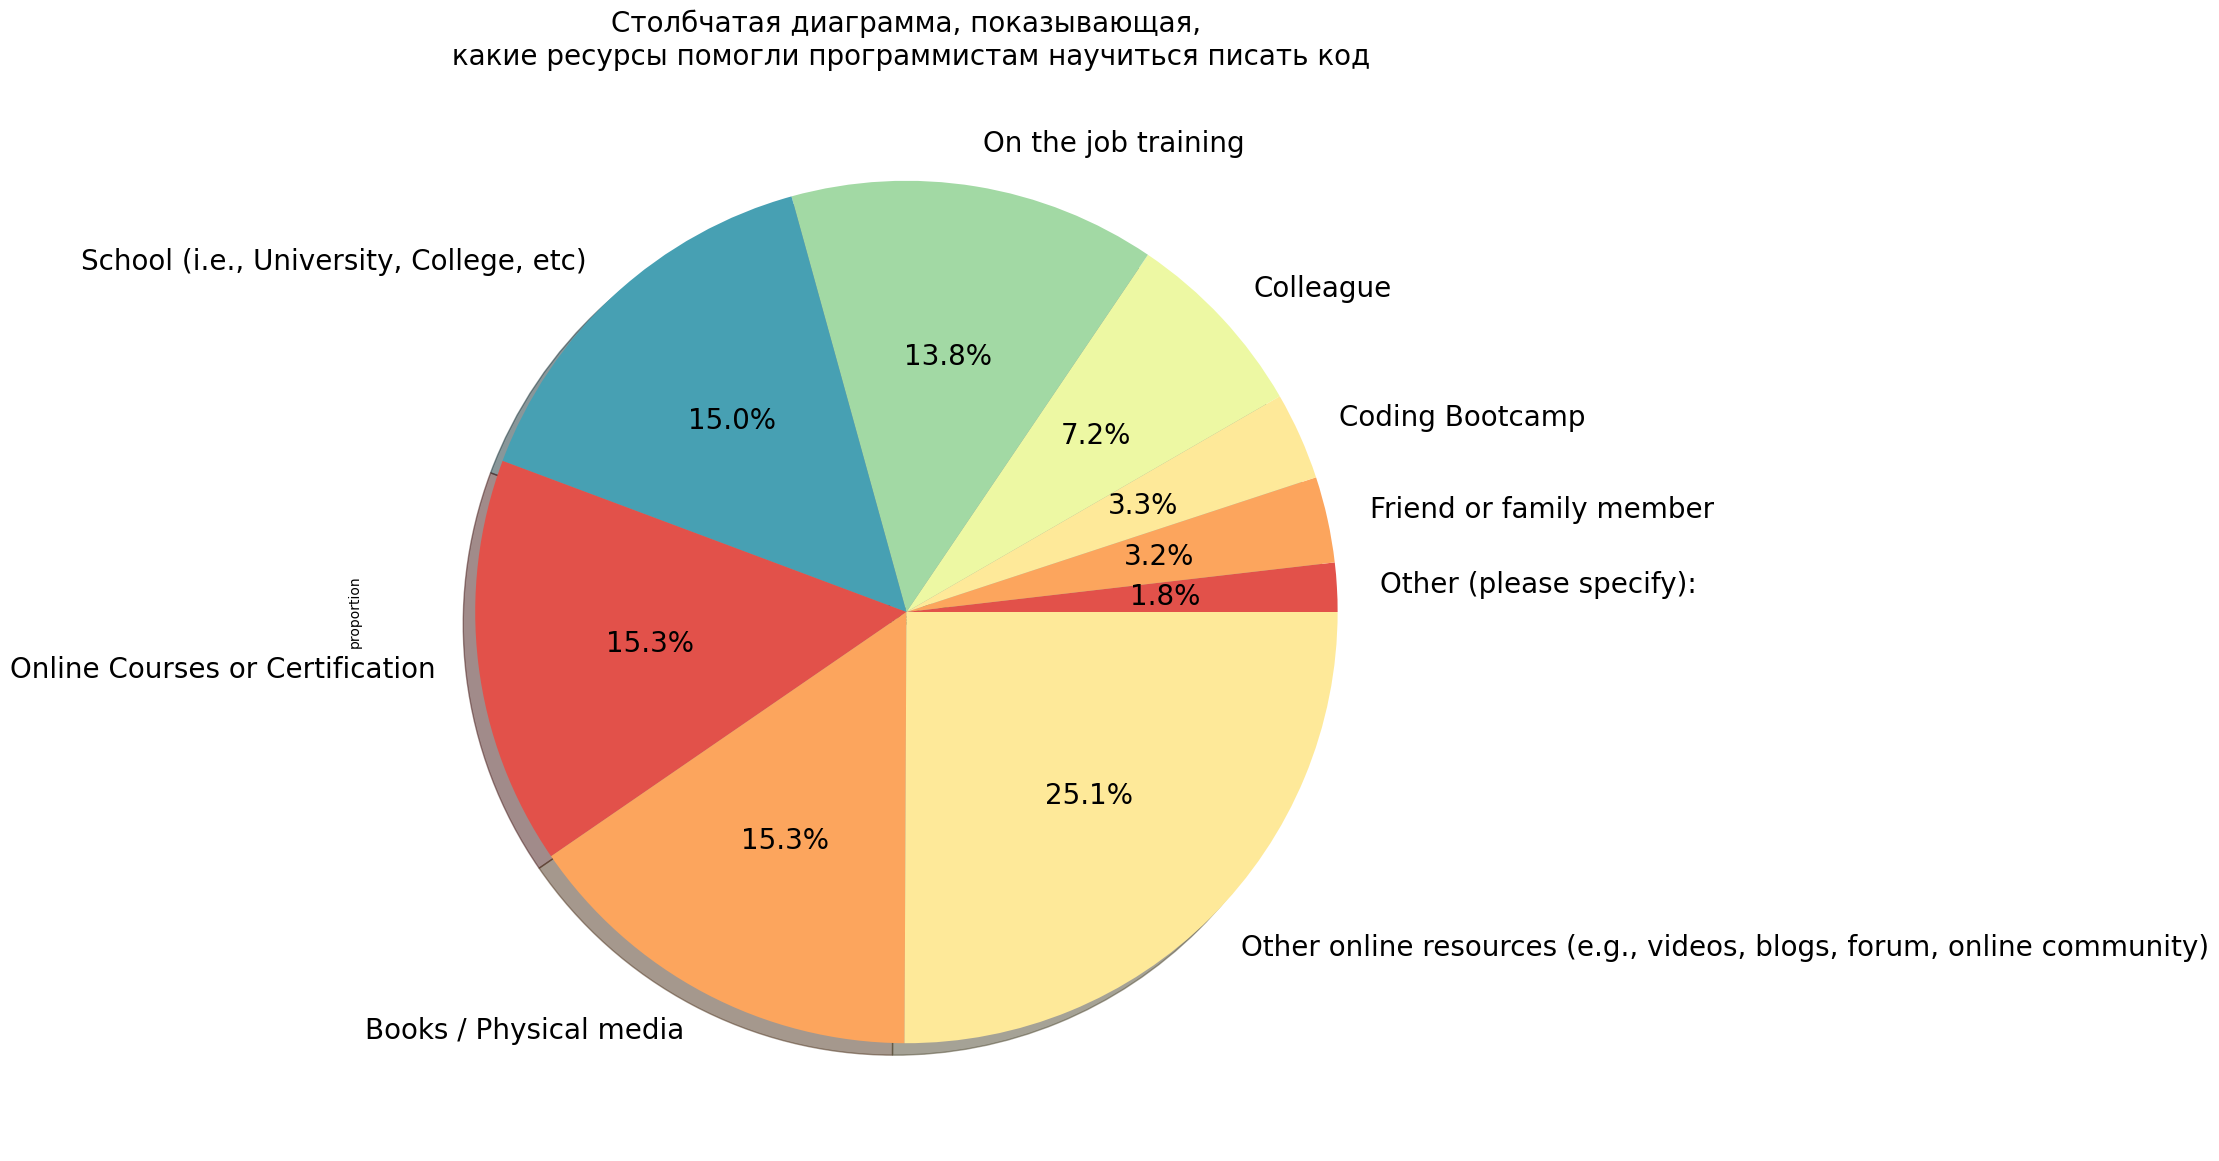

In [192]:
p = (
    work_df['LearnCode']
    .str.split(';')
    .explode()
    .value_counts(normalize=True)
    .sort_values()
    .plot.pie(autopct='%0.1f%%',
              figsize=(20, 14), 
              fontsize=20,
              colors=sns.color_palette('Spectral'),
              shadow=True)
    
)
plt.title('Столбчатая диаграмма, показывающая,\n какие ресурсы помогли программистам научиться писать код',
         fontsize=20) 

f = p.get_figure()
plt.show()

Наиболее популярным ресурсом для обучения программированию оказались **онлайн ресурсы** (видео, блоги, форумы, онлайн сообщества).

### 13. Как распределился опыт профессиональной работы среди разработчиков?

Для наглядности разделим опыт работы программистов на отдельные пять групп:

* Less than 1 year
* 1–2 years
* 3–5 years
* 6–10 years
* 11+ years

In [193]:
# Создадим копию датафрейма work_df и удалим строки из столбца YearsCodePro, в которых присутствует NaN
work_df_copy = work_df.copy() # 65437

work_df_copy = (
    work_df_copy.dropna(subset=['YearsCodePro'])
)

work_df_copy.shape

(51610, 8)

In [194]:
# Заменим строковое значение Less than 1 year в столбце YearsCode на 0, а значение More than 50 years – на 51
work_df_copy.loc[work_df_copy['YearsCodePro'] == 'Less than 1 year'] = 0
work_df_copy.loc[work_df_copy['YearsCodePro'] == 'More than 50 years'] = 51

In [195]:
# Приведем столбец YearsCodePro к числовому типу
work_df_copy['YearsCodePro'] = work_df_copy['YearsCodePro'].astype(int)

In [196]:
# Теперь создадим пять групп с опытом работы программистов

# Создадим столбец Experience, содержащий соответствующие группы
work_df_copy['Experience'] = pd.cut(x=work_df_copy['YearsCodePro'],
                             bins=[work_df_copy['YearsCodePro'].min(), 1, 2, 5, 10, work_df_copy['YearsCodePro'].max()],
                             labels=['Less than 1 year', '1-2 years', '3-5 years', '6-10 years', '11+ years'])
work_df_copy.head()

,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,Country,ConvertedCompYearly,Experience
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,20,17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,11+ years
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,37,27,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,11+ years
6,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,7,7,Academic researcher,United States of America,NaN,6-10 years
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,15,11,"Developer, full-stack",Serbia,NaN,11+ years
11,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Books / Physical media;School (i.e., Universit...",NaN,30,25,Developer Advocate,Poland,NaN,11+ years


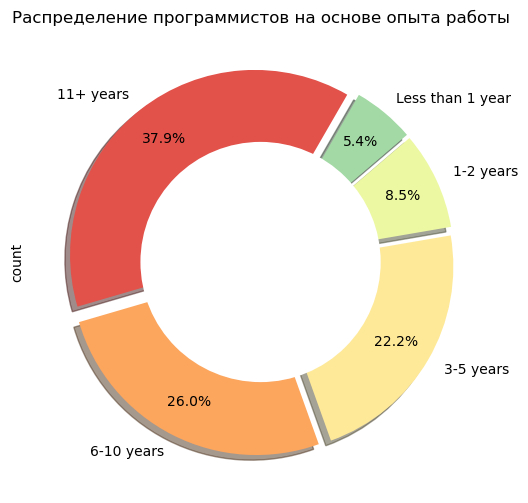

In [197]:
p = (
    work_df_copy['Experience']
    .value_counts()
    .plot.pie(autopct='%0.1f%%',
              figsize=(6, 6),
              explode=(0.05, 0.05, 0.05, 0.05, 0.05),
              fontsize=10,
              startangle=60,
              colors=sns.color_palette('Spectral'),
              pctdistance=0.80,
             shadow=True)
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Распределение программистов на основе опыта работы')
f = p.get_figure()
plt.show()

Более **37%** программистов имели опыт работы более **11 лет**.<br>**26%** программистов имели опыт работы **6-10 лет**.<br> Можно сказать, что в основном в опросе участвовали опытные программисты. 

### 14. В какой стране было больше всего разработчиков с опытом работы более 11 лет?

In [198]:
(
     work_df_copy.loc[work_df_copy['Experience'] == '11+ years']
    .groupby(['Country'])['Experience'].count()
    .sort_values(ascending=False)
    .head()   
)

Country
United States of America                                4503
Germany                                                 1535
United Kingdom of Great Britain and Northern Ireland    1359
Canada                                                   778
France                                                   627
Name: Experience, dtype: int64

Самое большое число разработчиков с опытом работы **более 11 лет** было в **США** - 4503 человек.

### 15. Сколько опытных программистов (11+ лет) было из России?

In [199]:
(
    work_df_copy
    .loc[(work_df_copy['Experience'] == '11+ years') & 
    (work_df_copy['Country'] == 'Russian Federation')]['Country']
    .count()
)

237

### 16. Топ-10 СУБД, с которыми работали программисты в 2024 году

In [200]:
tools_df = pd.read_csv('data/survey_results_public_2024.csv',
                      usecols=['DevType',
                               'DatabaseHaveWorkedWith',
                               'WebframeHaveWorkedWith',
                               'MiscTechHaveWorkedWith', 
                               'NEWCollabToolsHaveWorkedWith',
                               'OpSysPersonal use',
                               'OpSysProfessional use'
                              ])
tools_df

,DevType,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysPersonal use,OpSysProfessional use
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Developer, full-stack",Dynamodb;MongoDB;PostgreSQL,Express;Next.js;Node.js;React,NaN,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS
2,Developer Experience,Firebase Realtime Database,ASP.NET CORE,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,Visual Studio,Windows,Windows
3,"Developer, full-stack",MongoDB;MySQL;PostgreSQL;SQLite,jQuery;Next.js;Node.js;React;WordPress,NumPy;Pandas;Ruff;TensorFlow,NaN,NaN,NaN
4,"Developer, full-stack",PostgreSQL;SQLite,NaN,NaN,Vim,Other (please specify):,NaN
...,...,...,...,...,...,...,...
65432,Blockchain,NaN,NaN,NaN,NaN,NaN,NaN
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,"Developer, mobile",NaN,NaN,NaN,NaN,NaN,NaN
65435,"Developer, back-end",PostgreSQL;SQLite,Angular;Node.js;React,GTK;OpenGL,Vim;Visual Studio Code,Android;Other Linux-based;Ubuntu;Windows,Fedora;Other Linux-based;Ubuntu


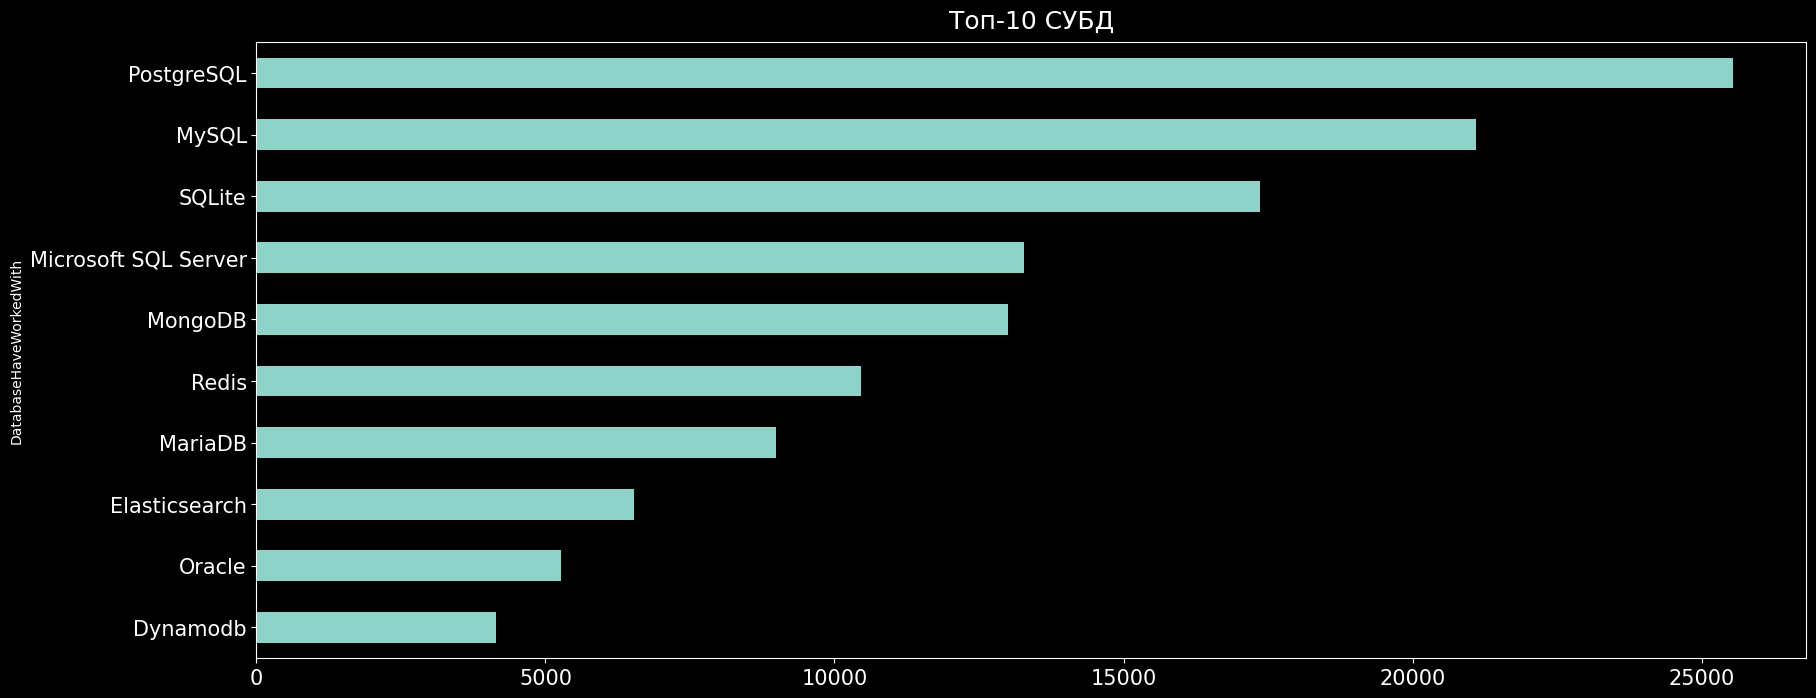

In [201]:
with plt.style.context('dark_background'):
    p = (
        tools_df['DatabaseHaveWorkedWith']
        .str.split(';')
        .explode()
        .value_counts()
        .head(10)
        .sort_values()
        .plot.barh(figsize=(20, 8), fontsize=15)
    )
plt.title('Топ-10 СУБД', 
          fontsize=18,
          pad=10)

f = p.get_figure()
plt.show()

Самыми популярными СУБД оказались **реляционные базы данных** (Postgres, MySQL, SQLite), лидером среди которых стал **PostgreSQL**.<br> Среди нереляционных СУБД наиболее популярными были **MongoDB, Redis**.

### 17. Топ-10 веб-фреймворков, с которыми работали программисты в 2024 году

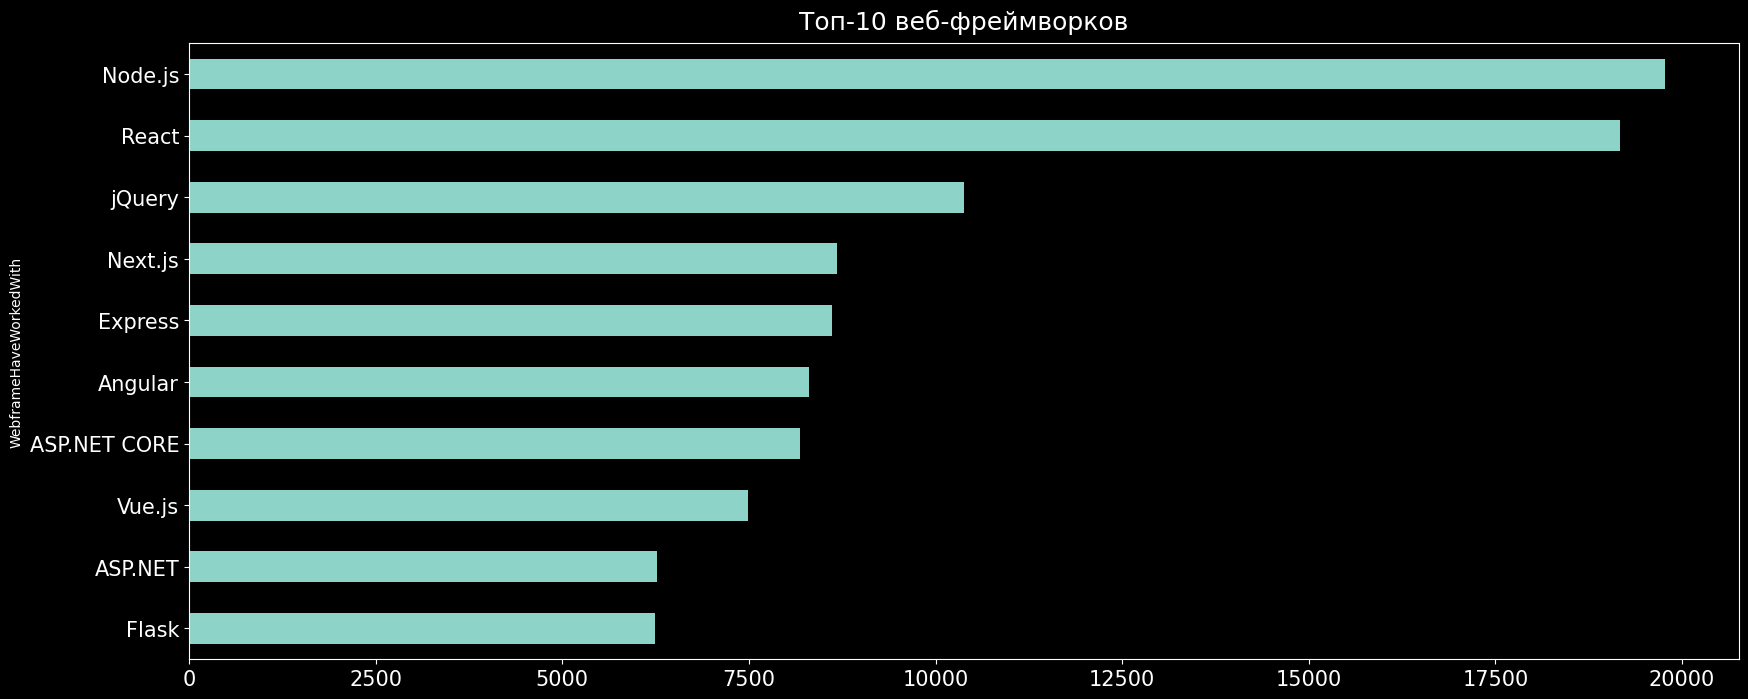

In [202]:
with plt.style.context('dark_background'):
    p = (
        tools_df['WebframeHaveWorkedWith']
        .str.split(';')
        .explode()
        .value_counts()
        .head(10)
        .sort_values()
        .plot.barh(figsize=(20, 8), fontsize=15)
    )
    
plt.title('Топ-10 веб-фреймворков', 
          fontsize=18,
          pad=10)

f = p.get_figure()
plt.show()

Самым популярным веб-фреймворком оказался **Node.js**.<br>Учитывая, что **JavaScript** - самый популярный язык программирования, не удивительно, что список десяти популярных веб-фрейморков возглавляют библиотеки, написанные на/для JavaScript.

### 18. Топ-10 самых популярных IDE для разработчиков

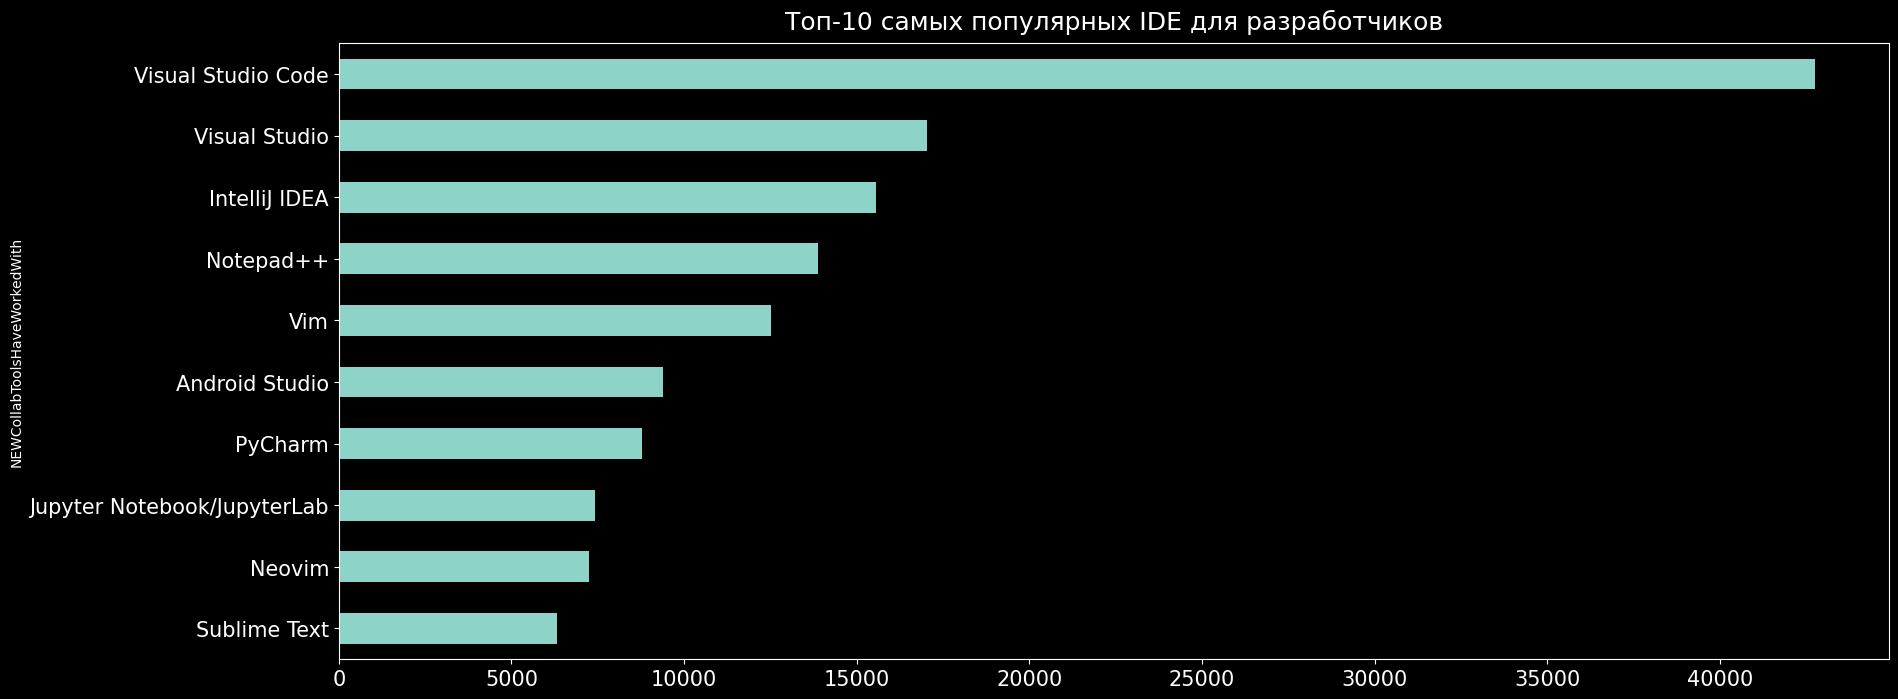

In [203]:
with plt.style.context('dark_background'):
    p = (
        tools_df['NEWCollabToolsHaveWorkedWith']
        .str.split(';')
        .explode()
        .value_counts()
        .head(10)
        .sort_values()
        .plot.barh(figsize=(20, 8), fontsize=15)
    )
plt.title('Топ-10 самых популярных IDE для разработчиков', 
          fontsize=18,
          pad=10)

f = p.get_figure()
plt.show()

Самым популярным интсрументом IDE для разработчиков был **Visual Studio Code**.

### 19. Какие библиотеки были самыме популярные по типу профессии?

In [204]:
# Определим все применяемые библиотеки
lib_df = (
    tools_df['MiscTechHaveWorkedWith']
    .str.split(';')
    .explode()
)
lib_df.head(10)

0                           NaN
1                           NaN
2                    .NET (5+) 
2    .NET Framework (1.0 - 4.8)
2                     .NET MAUI
3                         NumPy
3                        Pandas
3                          Ruff
3                    TensorFlow
4                           NaN
Name: MiscTechHaveWorkedWith, dtype: object

In [205]:
# 2. Объединим датафрейм tools_df (используем столбец DevType) и объект Series lib_df. 
# Далее сгруппируем по профессии и применим метод mode для получения наиболее часто встречаемого значения
(
    tools_df[['DevType']]
    .join(lib_df)
    .groupby('DevType')
    .agg(pd.Series.mode)
  
)

,MiscTechHaveWorkedWith
DevType,
Academic researcher,NumPy
Blockchain,Pandas
Cloud infrastructure engineer,Pandas
Data engineer,Pandas
Data or business analyst,Pandas
Data scientist or machine learning specialist,Pandas
Database administrator,.NET (5+)
Designer,.NET (5+)
DevOps specialist,Pandas


### 20. Какая библиотека машинного обучения PyTorch или TensorFlow была самой популярной среди разработчиков?

In [206]:
# Определим сколько раз встречалась каждая библиотека
libraries = (tools_df['MiscTechHaveWorkedWith']
    .str.split(';')
    .explode()
    .value_counts()          
)
libraries.head(10)

MiscTechHaveWorkedWith
.NET (5+)                     11542
NumPy                          9718
Pandas                         9501
.NET Framework (1.0 - 4.8)     7525
Spring Framework               5091
RabbitMQ                       5010
Scikit-Learn                   4849
Torch/PyTorch                  4846
TensorFlow                     4638
Apache Kafka                   4308
Name: count, dtype: int64

In [207]:
# Извлечем PyTorch
pytorch = libraries.loc[libraries.index == 'Torch/PyTorch']
pytorch

MiscTechHaveWorkedWith
Torch/PyTorch    4846
Name: count, dtype: int64

In [208]:
# Извлечем TensorFlow
tensorflow = libraries.loc[libraries.index == 'TensorFlow']
tensorflow

MiscTechHaveWorkedWith
TensorFlow    4638
Name: count, dtype: int64

In [209]:
pytorch_tensorflow = pd.concat([pytorch, tensorflow])
pytorch_tensorflow

MiscTechHaveWorkedWith
Torch/PyTorch    4846
TensorFlow       4638
Name: count, dtype: int64

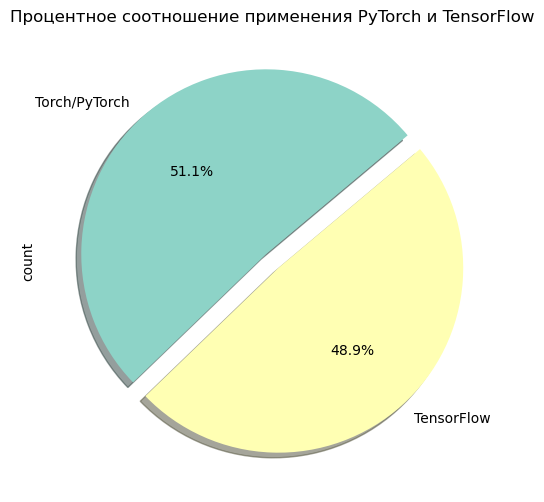

In [210]:
p = (
    pytorch_tensorflow
    .plot.pie(figsize=(6, 6),
              autopct='%1.1f%%',
              explode=(0.05, 0.05),
              startangle=40,
              colors=sns.color_palette('Set3'),
             shadow=True)
)
plt.title('Процентное соотношение применения PyTorch и TensorFlow')
f = p.get_figure()
plt.show()

**PyTorch** оказался слегка более популярной библиотекой машинного обучения, чем **TensoFlow**. 

### 21. С какой операционной системой программисты работали дома / на работе: с Windows или MacOS?

Дома:

In [211]:
# Определим сколько раз встречалась каждая операционная система
personal_use = (tools_df['OpSysPersonal use']
    .str.split(';')
    .explode()
    .value_counts()
)
personal_use.head()

OpSysPersonal use
Windows                              34691
MacOS                                18633
Ubuntu                               16205
Android                              10471
Windows Subsystem for Linux (WSL)    10042
Name: count, dtype: int64

In [212]:
# Извлечем Windows users
windows_personal_use = personal_use.loc[personal_use.index == 'Windows']
windows_personal_use

OpSysPersonal use
Windows    34691
Name: count, dtype: int64

In [213]:
# Извлучем MacOS users
macos_personal_use = personal_use.loc[personal_use.index == 'MacOS']
macos_personal_use

OpSysPersonal use
MacOS    18633
Name: count, dtype: int64

In [214]:
# Объединим windows_personal_use и macos_personal_use
personal_use = pd.concat([windows_personal_use, macos_personal_use])
personal_use

OpSysPersonal use
Windows    34691
MacOS      18633
Name: count, dtype: int64

На работе:

In [215]:
# Определим сколько раз встречалась каждая операционная система
prof_use = (tools_df['OpSysProfessional use']
    .str.split(';')
    .explode()
    .value_counts()
)
prof_use.head()

OpSysProfessional use
Windows                              27918
MacOS                                18625
Ubuntu                               16237
Windows Subsystem for Linux (WSL)     9859
Debian                                5327
Name: count, dtype: int64

In [216]:
# Извлечем Windows users
windows_prof_use = prof_use.loc[prof_use.index == 'Windows']
windows_prof_use

OpSysProfessional use
Windows    27918
Name: count, dtype: int64

In [217]:
# Извлучем MacOS users
macos_prof_use = prof_use.loc[prof_use.index == 'MacOS']
macos_prof_use

OpSysProfessional use
MacOS    18625
Name: count, dtype: int64

In [218]:
# Объединим windows_personal_use и macos_personal_use
professional_use = pd.concat([windows_prof_use, macos_prof_use])
professional_use

OpSysProfessional use
Windows    27918
MacOS      18625
Name: count, dtype: int64

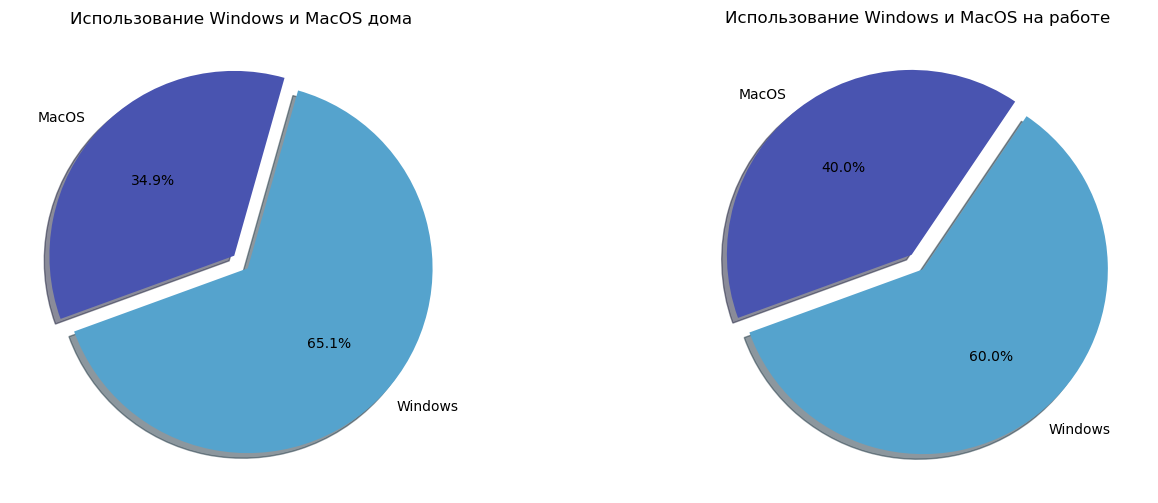

In [219]:
fig, (ax0, ax1) = plt.subplots(nrows=1, 
                               ncols=2,
                               figsize=(16, 6))

# For personal use
pie = ax0.pie(personal_use,
             autopct='%1.1f%%',
             explode=(0.05, 0.05),
             startangle=200,
             colors=sns.color_palette('icefire'),
             labels=personal_use.index,
             shadow=True)
ax0.set(title="Использование Windows и MacOS дома")


# For professional use
pie = ax1.pie(professional_use,
             autopct='%1.1f%%',
             explode=(0.05, 0.05),
             startangle=200,
             colors=sns.color_palette('icefire'),
             labels=professional_use.index,
             shadow=True)
ax1.set(title="Использование Windows и MacOS на работе")

plt.show()

## III. Stack Overflow

In [220]:
so_df = pd.read_csv('data/survey_results_public_2024.csv',
                   usecols=['SOPartFreq', 
                            'NEWSOSites', 
                            'SOHow',
                            'Country'])
so_df

,Country,NEWSOSites,SOPartFreq,SOHow
0,United States of America,I have never visited Stack Overflow or the Sta...,NaN,NaN
1,United Kingdom of Great Britain and Northern I...,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Quickly finding code solutions;Finding reliabl...
2,United Kingdom of Great Britain and Northern I...,Stack Overflow;Stack Exchange;Stack Overflow B...,Multiple times per day,Quickly finding code solutions;Finding reliabl...
3,Canada,Stack Overflow,NaN,Quickly finding code solutions
4,Norway,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Quickly finding code solutions;Engage with com...
...,...,...,...,...
65432,NaN,NaN,NaN,NaN
65433,NaN,Stack Overflow;Stack Exchange,NaN,NaN
65434,NaN,NaN,NaN,NaN
65435,Germany,Stack Overflow;Stack Exchange,NaN,Quickly finding code solutions


### 1. Какие сайты проекта Stack Overflow посещали разработчики?

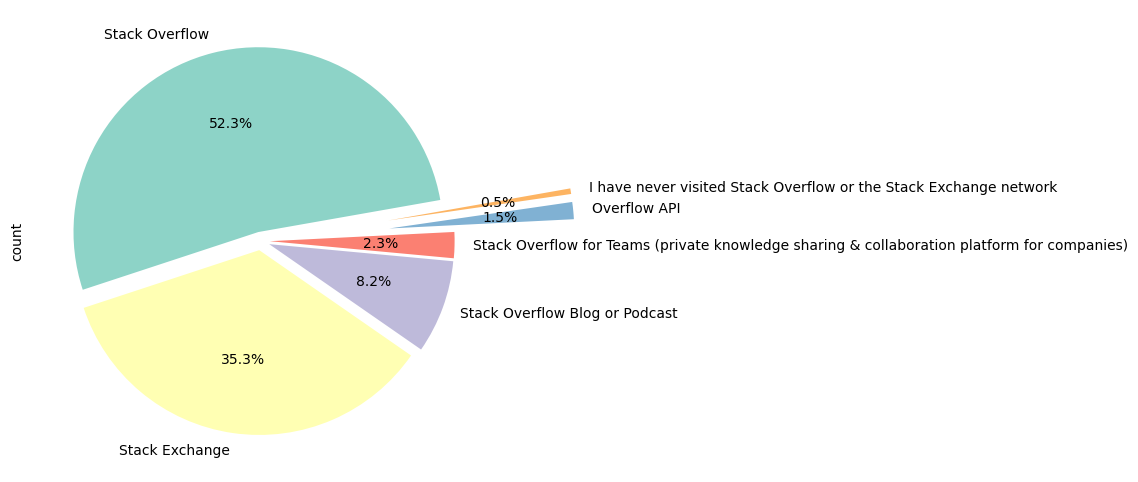

In [221]:
p = (
    so_df['NEWSOSites']
    .str.split(';')
    .explode()
    .value_counts()
    .plot.pie(figsize=(6, 6),
              autopct='%1.1f%%',
              explode=(0.05, 0.05, 0.05, 0.05, 0.7, 0.7),
              startangle=10,
              colors=sns.color_palette('Set3'),
             )
    
)

f = p.get_figure()
plt.show()

Наиболее популярным сайтом среди программистов оказался **Stack Overflow**.<br>Это не удивительно, так как этот сайт - как раз для программистов и разработчиков, где можно найти ответы на многие вопросы.<br>Интересно отметить, что среди программистов был небольшой процент (**0.5%**) и тех, кто никогда не посещал Stack Overflow или Stack Exchange.

### 2. Для каких целей разработчики посещали Stack Overflow?

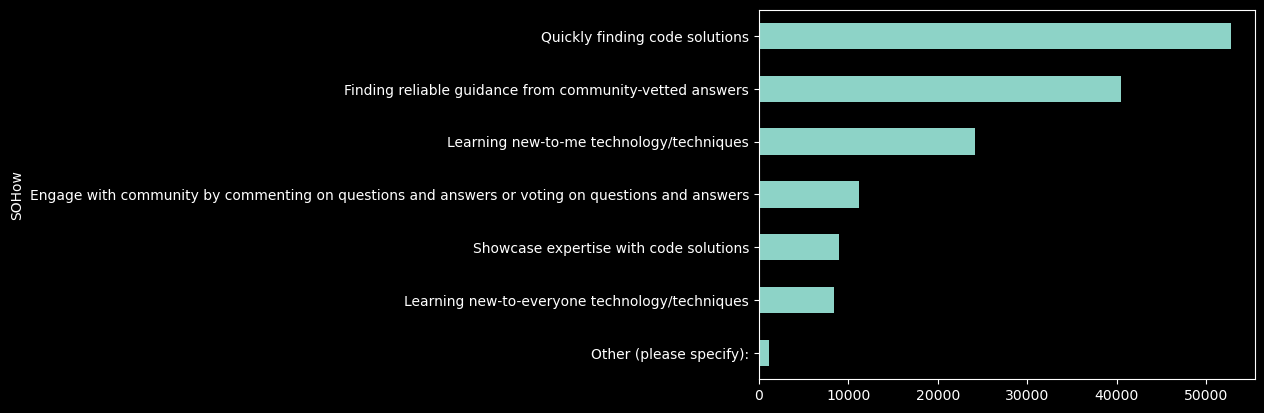

In [222]:
with plt.style.context('dark_background'):
    p = (
        so_df['SOHow']
        .str.split(';')
        .explode()
        .value_counts()
        .sort_values()
        .plot.barh()
    )

f = p.get_figure()
plt.show()

Самым популярным ответом оказался ответ **Quickly finding code solutions** - быстрый поиск кодового решения.

### 3. Из каких пяти стран больше всего программистов, которые ЕЖЕДНЕВНО принимают участие на Stack Overflow, то есть задают вопросы, отвечают или комментируют их?

In [223]:
five_countries = (
    so_df.loc[so_df['SOPartFreq'].isin(['Daily or almost daily'])]
    .groupby('Country')['SOPartFreq']
    .count()
    .sort_values(ascending=False)
    .head()
)

five_countries.index

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'France'],
      dtype='object', name='Country')

Это **США, Германия, Индия, Великобритания и Северная Ирландия, Франция**.

## IV. Искусственный интеллект (ИИ)

In [224]:
ai_df = pd.read_csv('data/survey_results_public_2024.csv',
                   usecols=['AISelect', 
                            'AIThreat', 
                            'AIAcc',
                            'AIComplex',
                            'AIBen',
                            'AIToolCurrently Using',
                            'DevType',
                            'Country'])

ai_df

,DevType,Country,AISelect,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIThreat
0,NaN,United States of America,Yes,Increase productivity,NaN,NaN,NaN,NaN
1,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN
2,Developer Experience,United Kingdom of Great Britain and Northern I...,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN
3,"Developer, full-stack",Canada,Yes,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks,Learning about a codebase;Project planning;Wri...,No
4,"Developer, full-stack",Norway,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
65432,Blockchain,NaN,Yes,Increase productivity;Greater efficiency;Speed...,Neither trust nor distrust,"Good, but not great at handling complex tasks",Learning about a codebase;Project planning;Wri...,No
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,"Developer, mobile",NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,"Developer, back-end",Germany,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN


### 1. Сколько программистов пользовалось инструментами ИИ в своей работе?

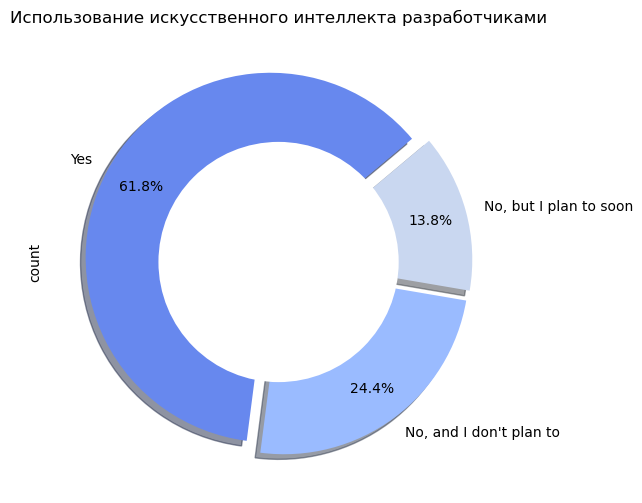

In [225]:
p = (
    ai_df['AISelect']
    .value_counts()
    .plot.pie(autopct='%0.1f%%',
              figsize=(6, 6),
              explode=(0.05, 0.05, 0.05),
              fontsize=10,
              startangle=40,
              colors=sns.color_palette('coolwarm'),
              pctdistance=0.80,
              shadow=True)
    
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Использование искусственного интеллекта разработчиками')
f = p.get_figure()
plt.show()

Более **60%** респондентов отвелили, что использовали ИИ в своей работе.<br>**24%** ответили, что не применяли ИИ и не планируют его применять в своей работе.

### 2. В какой стране больше всего программистов, применявших ИИ в своей работе?

In [226]:
ai_by_country = (
    ai_df
    .loc[ai_df['AISelect'].isin(['Yes'])]
    .groupby('Country')['AISelect']
    .count()
    .sort_values(ascending=False)
    .apply(lambda x: f'{x:,.2f}')
)

ai_by_country.head()

Country
United States of America                                5,968.00
India                                                   2,827.00
Germany                                                 2,804.00
Ukraine                                                 1,930.00
United Kingdom of Great Britain and Northern Ireland    1,627.00
Name: AISelect, dtype: object

В **США** больше всего программистов, применяющих ИИ в своей работе - **почти шесть тысяч** разработчиков.

### 3. Сколько программистов из России использовало ИИ?

In [227]:
ai_by_country.loc['Russian Federation']

'436.00'

### 4. Как распределяется использование ИИ по профессиям программистов?

In [228]:
# # Option 1
# ai_by_dev_type = (
#     ai_df
#     .loc[ai_df['AISelect'].isin(['Yes'])]
#     .groupby('DevType')['AISelect']
#     .count()
#     .sort_values(ascending=False)
#     .apply(lambda x: f'{x:,.2f}')
# )

# ai_by_dev_type

# Option 2
ai_by_dev_type = (
    ai_df.groupby('DevType')['AISelect']
    .apply(lambda x: x.str.contains('Yes').sum())
    .sort_values(ascending=False)
    .apply(lambda x: f'{x:,.2f}')
)

ai_by_dev_type

DevType
Developer, full-stack                            11,654.00
Developer, back-end                               5,999.00
Student                                           3,094.00
Developer, front-end                              2,243.00
Developer, mobile                                 1,283.00
Other (please specify):                           1,240.00
Developer, desktop or enterprise applications     1,100.00
Engineering manager                                 783.00
Data scientist or machine learning specialist       724.00
Academic researcher                                 693.00
Developer, embedded applications or devices         691.00
Data engineer                                       659.00
DevOps specialist                                   597.00
Senior Executive (C-Suite, VP, etc.)                580.00
Research & Development role                         499.00
Developer, AI                                       435.00
Cloud infrastructure engineer                   

Список профессий возглавляют направления, связанные с разработкой приложений.<br> **Developer, full-stack** оказался самой популярной профессией, где больше всего применяется ИИ.

### 5. Какие преимущества программисты надеялись получить от применения ИИ в своей работе?

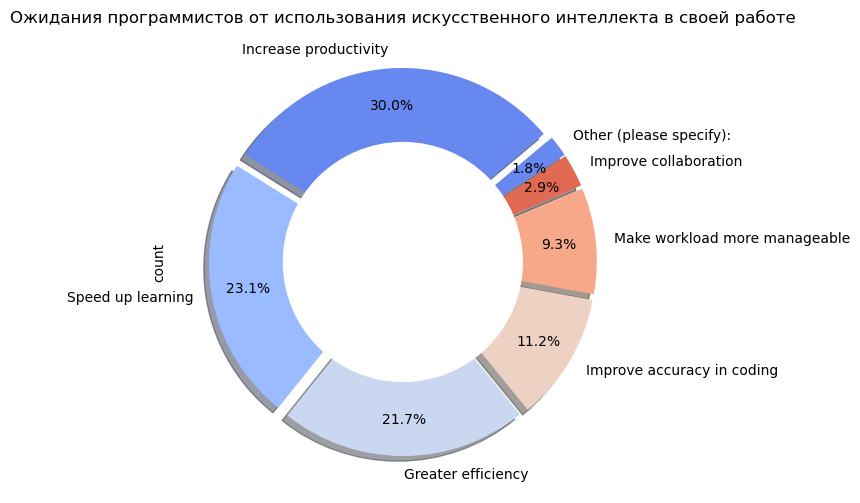

In [229]:
p = (
    ai_df['AIBen']
    .str.split(';')
    .explode()
    .value_counts()
    .plot.pie(autopct='%0.1f%%',
              figsize=(6, 6),
              explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
              fontsize=10,
              startangle=40,
              colors=sns.color_palette('coolwarm'),
              pctdistance=0.80,
              shadow=True)
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Ожидания программистов от использования искусственного интеллекта в своей работе')

f = p.get_figure()
plt.show()

Применяя ИИ в своей работе, программисты, в первую очередь, надеялись **увеличить производительность**.

### 6. В каких областях рабочего процесса разработки программисты применяли ИИ?

In [230]:
ai_tools = (
    ai_df['AIToolCurrently Using']
    .str.split(';')
    .explode()
    .value_counts()
)
ai_tools

AIToolCurrently Using
Writing code                            29486
Search for answers                      24295
Debugging and getting help              20404
Documenting code                        14439
Generating content or synthetic data    12538
Learning about a codebase               11105
Testing code                             9787
Committing and reviewing code            4756
Project planning                         4381
Predictive analytics                     1888
Deployment and monitoring                1603
Other (please specify):                   449
Name: count, dtype: int64

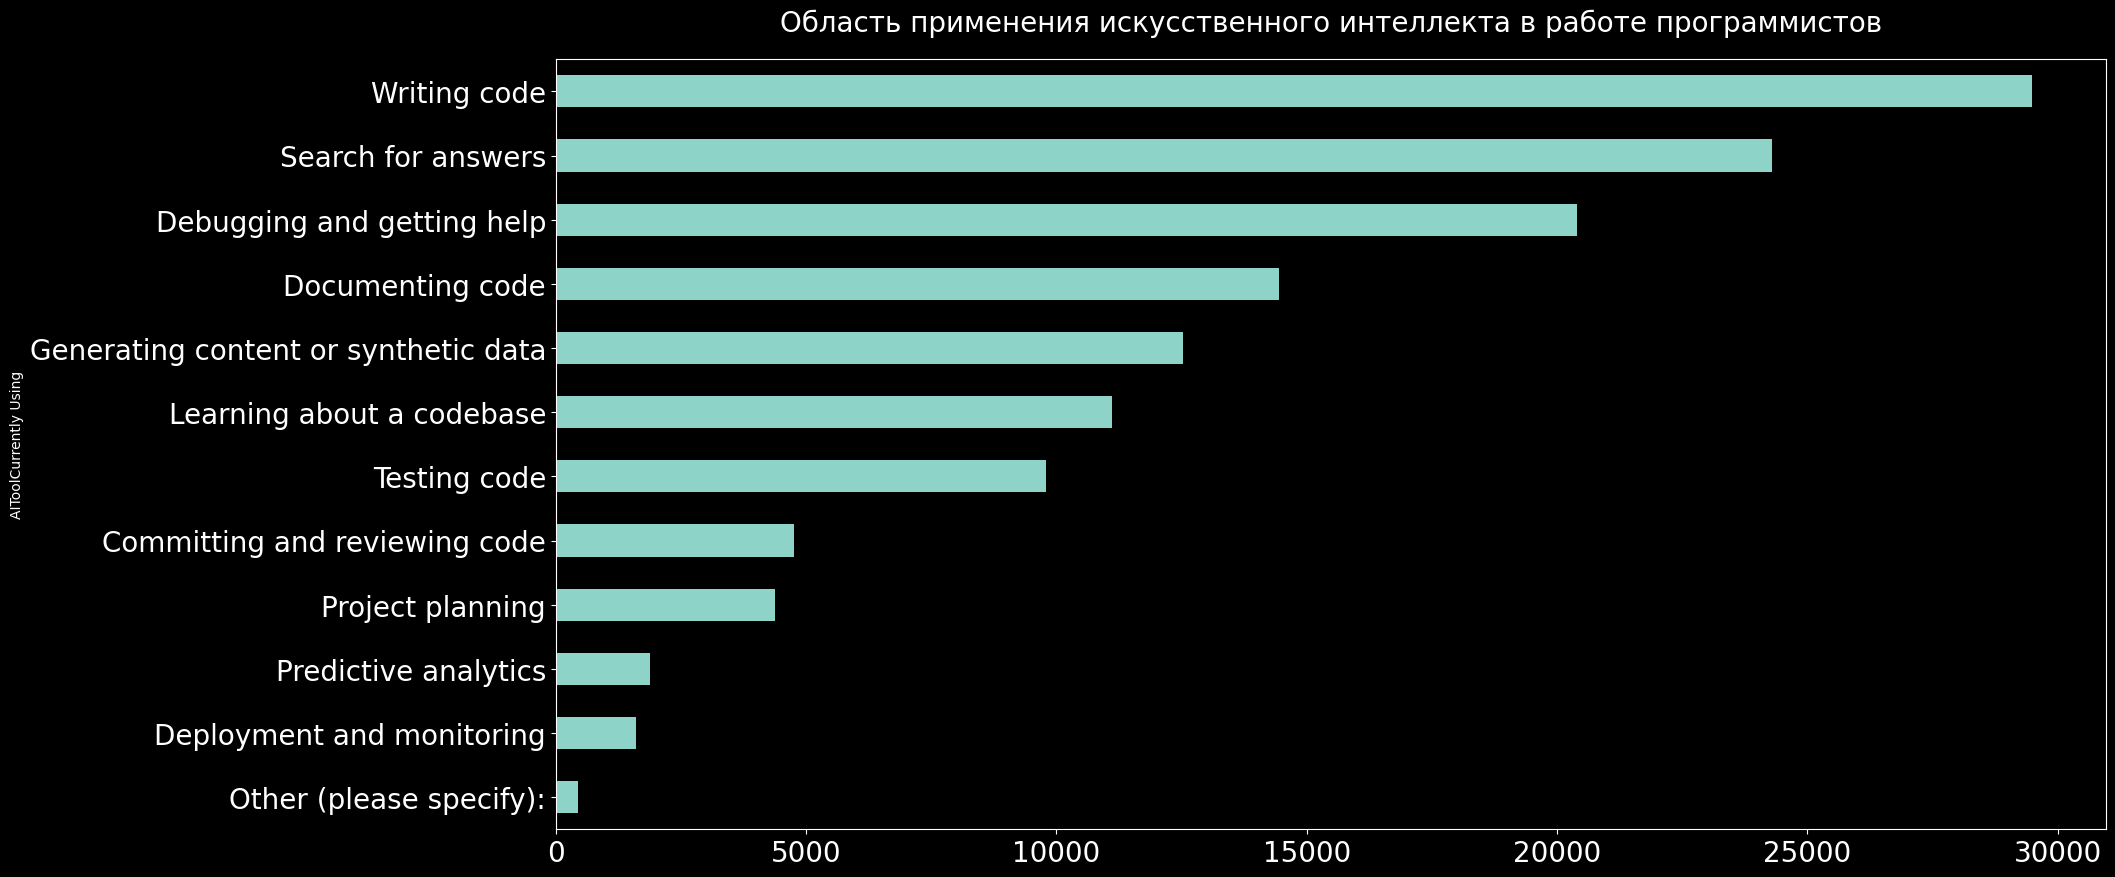

In [231]:
with plt.style.context('dark_background'):
    p = (ai_tools
     .sort_values()
     .plot.barh(figsize=(20, 10),
               fontsize=20)
    )

plt.title('Область применения искусственного интеллекта в работе программистов', fontsize=20, pad=20)
f = p.get_figure()
plt.show()

**Написание кода (Writing code)** оказалось самой популярной областью применения ИИ в работе программистов. Интересно отметить, что **Предиктивная аналитика (Predictive analytics)** оказалась в числе наменее популярных областей применения ИИ.

### 7. Насколько программисты доверяли точности результатов, получаемых с помощью ИИ?

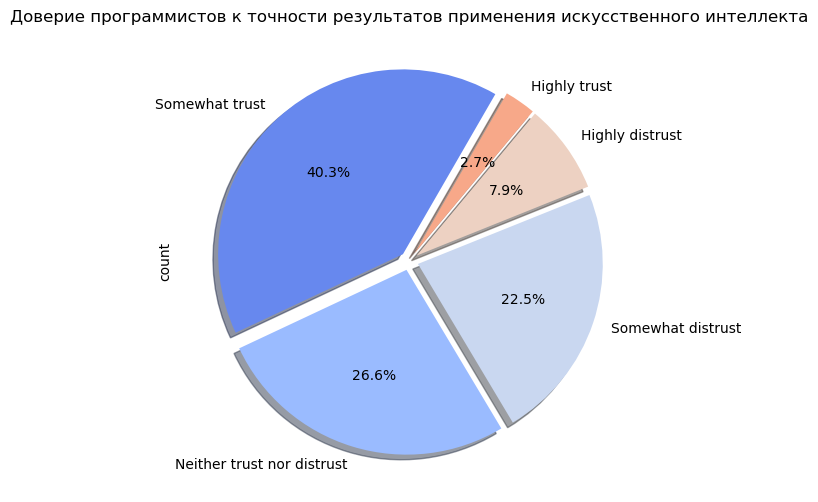

In [232]:
p = (
    ai_df['AIAcc']
    .value_counts()
    .plot.pie(autopct='%0.1f%%',
              figsize=(6, 6),
              explode=(0.05, 0.05, 0.05, 0.05, 0.05),
              fontsize=10,
              startangle=60,
              colors=sns.color_palette('coolwarm'),
              shadow=True)
    
)

plt.title('Доверие программистов к точности результатов применения искусственного интеллекта')
f = p.get_figure()
plt.show()

**40%** программистов испатывали некоторое доверие (**Somewhat trust**) к точности результатов, получаемых с помощью ИИ. 

### 8. По мнению разработчиков, насколько хорошо ИИ справлялся со сложными задачами?

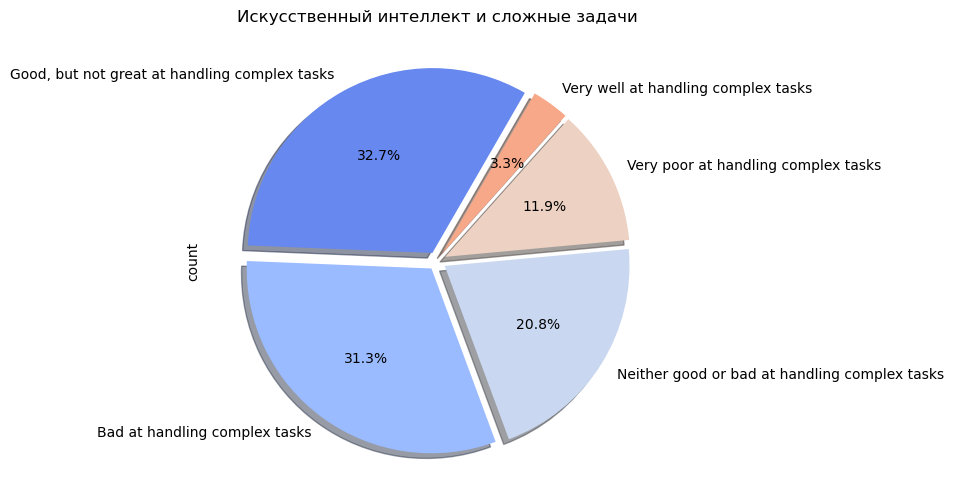

In [233]:
p = (
    ai_df['AIComplex']
    .value_counts()
    .plot.pie(autopct='%0.1f%%',
              figsize=(6, 6),
              explode=(0.05, 0.05, 0.05, 0.05, 0.05),
              fontsize=10,
              startangle=60,
              colors=sns.color_palette('coolwarm'),
              shadow=True)
    
)

plt.title('Искусственный интеллект и сложные задачи')
f = p.get_figure()
plt.show()

**32.7%** программистов считают, что ИИ **хорошо, но не отлично** справляется со сложными задачами.<br>Однако, большая часть программистов, полагает, что ИИ **плохо** или **очень плохо** справляется со сложными задачами, **31%** и **11.9%** соответственно.<br>**20.8%** программистов никак не оценивают работу ИИ.

### 9. Рассматривают ли программисты ИИ как угрозу для своей работы?

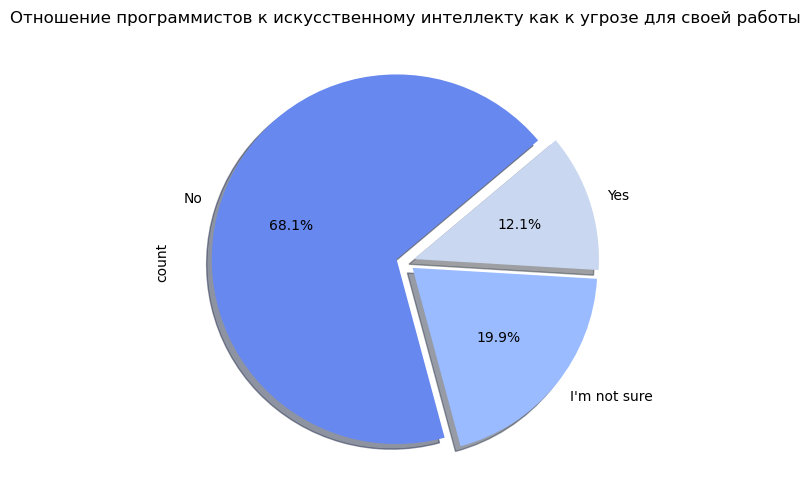

In [234]:
p = (
    ai_df['AIThreat']
    .value_counts()
    .plot.pie(autopct='%0.1f%%',
              figsize=(6, 6),
              explode=(0.05, 0.05, 0.05),
              fontsize=10,
              startangle=40,
              colors=sns.color_palette('coolwarm'),
              shadow=True)
    
)

plt.title('Отношение программистов к искусственному интеллекту как к угрозе для своей работы')
f = p.get_figure()
plt.show()

**12%** программистов видят в ИИ угрозу для своей работы.

## V. Топ-5 самых популярных языков программирования в динамике (2020 - 2024)гг.

In [235]:
# 2020 year
df_2020 = pd.read_csv('data/survey_results_public_2020.csv',
                      header=0,
                      usecols=[22],
                      names=['LanguageHaveWorkedWith'])

# Add a column - YearSurvey
df_2020['YearSurvey'] = 2020

df_2020.head()

,LanguageHaveWorkedWith,YearSurvey
0,C#;HTML/CSS;JavaScript,2020
1,JavaScript;Swift,2020
2,Objective-C;Python;Swift,2020
3,NaN,2020
4,HTML/CSS;Ruby;SQL,2020


In [236]:
# 2021 year
df_2021 = pd.read_csv('data/survey_results_public_2021.csv',
                      header=0,
                      usecols=[16],
                      names=['LanguageHaveWorkedWith'])

# Add a column - YearSurvey
df_2021['YearSurvey'] = '2021'

df_2021.head()

,LanguageHaveWorkedWith,YearSurvey
0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,2021
1,JavaScript;Python,2021
2,Assembly;C;Python;R;Rust,2021
3,JavaScript;TypeScript,2021
4,Bash/Shell;HTML/CSS;Python;SQL,2021


In [237]:
# 2022 year
df_2022 = pd.read_csv('data/survey_results_public_2022.csv',
                      header=0,
                      usecols=[19],
                      names=['LanguageHaveWorkedWith'])

# Add a column - YearSurvey
df_2022['YearSurvey'] = 2022

df_2022.head()

,LanguageHaveWorkedWith,YearSurvey
0,NaN,2022
1,JavaScript;TypeScript,2022
2,C#;C++;HTML/CSS;JavaScript;Python,2022
3,C#;JavaScript;SQL;TypeScript,2022
4,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,2022


In [238]:
# 2023 year
df_2023 = pd.read_csv('data/survey_results_public_2023.csv',
                      header=0,
                      usecols=[21],
                      names=['LanguageHaveWorkedWith'])

# Add a column - YearSurvey
df_2023['YearSurvey'] = 2023
df_2023.head()

,LanguageHaveWorkedWith,YearSurvey
0,NaN,2023
1,HTML/CSS;JavaScript;Python,2023
2,Bash/Shell (all shells);Go,2023
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,2023
4,HTML/CSS;JavaScript;TypeScript,2023


In [239]:
# 2024 year
df_2024 = pd.read_csv('data/survey_results_public_2024.csv',
                      header=0,
                      usecols=[22],
                      names=['LanguageHaveWorkedWith'])

# Add a column - YearSurvey
df_2024['YearSurvey'] = 2024

df_2024.head()

,LanguageHaveWorkedWith,YearSurvey
0,NaN,2024
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,2024
2,C#,2024
3,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,2024
4,C++;HTML/CSS;JavaScript;Lua;Python;Rust,2024


In [240]:
# Объединим все в единый датафрейм
df = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024])
df

,LanguageHaveWorkedWith,YearSurvey
0,C#;HTML/CSS;JavaScript,2020
1,JavaScript;Swift,2020
2,Objective-C;Python;Swift,2020
3,NaN,2020
4,HTML/CSS;Ruby;SQL,2020
...,...,...
65432,NaN,2024
65433,NaN,2024
65434,NaN,2024
65435,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,2024


In [241]:
df.dtypes

LanguageHaveWorkedWith    object
YearSurvey                object
dtype: object

### 1. Какой язык был самым популярным в период с 2020 по 2024 года?

In [242]:
# Определим все языки
all_languages = (
    df['LanguageHaveWorkedWith']
    .str.split(';')
    .explode()
)

all_languages

0                C#
0          HTML/CSS
0        JavaScript
1        JavaScript
1             Swift
            ...    
65436          Java
65436    JavaScript
65436           PHP
65436        Python
65436    TypeScript
Name: LanguageHaveWorkedWith, Length: 1904969, dtype: object

In [243]:
(
    df[['YearSurvey']].join(all_languages)
    .groupby('YearSurvey').agg(pd.Series.mode)
)

,LanguageHaveWorkedWith
YearSurvey,
2020,JavaScript
2022,JavaScript
2023,JavaScript
2024,JavaScript
2021,JavaScript


На протяжении последних 5-ти лет **JavaScript** оставался самым популярным языком программирования.

### 2. Динамика Топ-5 языков программирования

In [244]:
# Определим ТОП-5 самых популярных языков программирования по годам

# Для этого создадим функцию get_top_ten(), которая вернет 5 самых популярных языков
def get_top_ten(s):
    languages = (
        s
        .str.split(';')
        .explode()
        .value_counts()
        .head()
    )
    return languages

In [245]:
# 2020 year
top_df_2020 = get_top_ten(df_2020['LanguageHaveWorkedWith'])
top_df_2020 = pd.DataFrame(top_df_2020)
top_df_2020['YearSurvey'] = 2020

top_df_2020

,count,YearSurvey
LanguageHaveWorkedWith,,
JavaScript,38822,2020
HTML/CSS,36181,2020
SQL,31413,2020
Python,25287,2020
Java,23074,2020


In [246]:
# 2021 year
top_df_2021 = get_top_ten(df_2021['LanguageHaveWorkedWith'])
top_df_2021 = pd.DataFrame(top_df_2021)
top_df_2021['YearSurvey'] = 2021

top_df_2021

,count,YearSurvey
LanguageHaveWorkedWith,,
JavaScript,53587,2021
HTML/CSS,46259,2021
Python,39792,2021
SQL,38835,2021
Java,29162,2021


In [247]:
# 2022 year
top_df_2022 = get_top_ten(df_2022['LanguageHaveWorkedWith'])
top_df_2022 = pd.DataFrame(top_df_2022)
top_df_2022['YearSurvey'] = 2022

top_df_2022

,count,YearSurvey
LanguageHaveWorkedWith,,
JavaScript,46443,2022
HTML/CSS,39142,2022
SQL,35127,2022
Python,34155,2022
TypeScript,24752,2022


In [248]:
# 2023 year
top_df_2023 = get_top_ten(df_2023['LanguageHaveWorkedWith'])
top_df_2023 = pd.DataFrame(top_df_2023)
top_df_2023['YearSurvey'] = 2023

top_df_2023

,count,YearSurvey
LanguageHaveWorkedWith,,
JavaScript,55711,2023
HTML/CSS,46396,2023
Python,43158,2023
SQL,42623,2023
TypeScript,34041,2023


In [249]:
# 2024 year
top_df_2024 = get_top_ten(df_2024['LanguageHaveWorkedWith'])
top_df_2024 = pd.DataFrame(top_df_2024)
top_df_2024['YearSurvey'] = 2024

top_df_2024

,count,YearSurvey
LanguageHaveWorkedWith,,
JavaScript,37492,2024
HTML/CSS,31816,2024
Python,30719,2024
SQL,30682,2024
TypeScript,23150,2024


In [250]:
# Объединим все в единый датафрейм
top_df = pd.concat([top_df_2020, top_df_2021, top_df_2022, top_df_2023, top_df_2024])
top_df

,count,YearSurvey
LanguageHaveWorkedWith,,
JavaScript,38822,2020
HTML/CSS,36181,2020
SQL,31413,2020
Python,25287,2020
Java,23074,2020
JavaScript,53587,2021
HTML/CSS,46259,2021
Python,39792,2021
SQL,38835,2021


In [251]:
top_df = top_df.reset_index()
top_df

,LanguageHaveWorkedWith,count,YearSurvey
0,JavaScript,38822,2020
1,HTML/CSS,36181,2020
2,SQL,31413,2020
3,Python,25287,2020
4,Java,23074,2020
5,JavaScript,53587,2021
6,HTML/CSS,46259,2021
7,Python,39792,2021
8,SQL,38835,2021
9,Java,29162,2021


**Тепловая карта**

In [252]:
# Для большей наглядности создадим сводную таблицу
# pd.options.display.float_format = '{:,.1f}'.format

pivot = top_df.pivot_table(index="LanguageHaveWorkedWith", 
                           columns="YearSurvey", 
                           values="count")
pivot

YearSurvey,2020,2021,2022,2023,2024
LanguageHaveWorkedWith,,,,,
HTML/CSS,36181.0,46259.0,39142.0,46396.0,31816.0
Java,23074.0,29162.0,NaN,NaN,NaN
JavaScript,38822.0,53587.0,46443.0,55711.0,37492.0
Python,25287.0,39792.0,34155.0,43158.0,30719.0
SQL,31413.0,38835.0,35127.0,42623.0,30682.0
TypeScript,NaN,NaN,24752.0,34041.0,23150.0


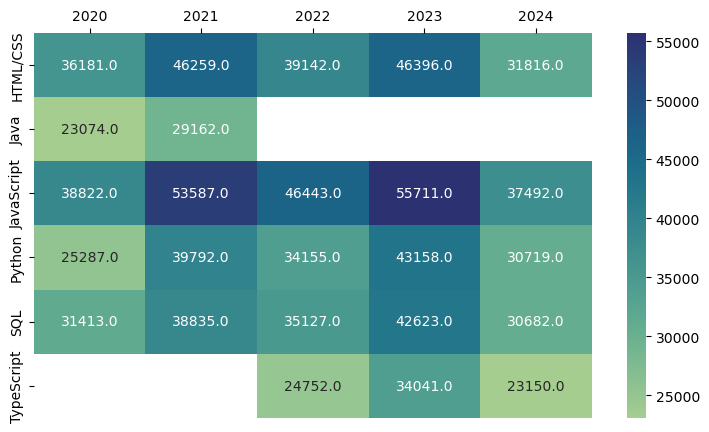

In [253]:
# Отобразим данные на тепловой карте
plt.figure(figsize = (9, 5))
ax = sns.heatmap(pivot, 
                 annot=True, 
                 cmap="crest", 
                 fmt=".1f")

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

plt.show()

**Линейная диаграмма**

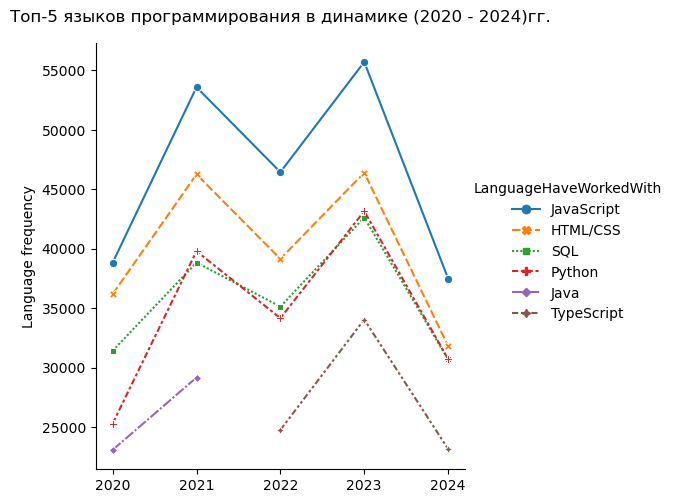

In [254]:
# Отобразим данные на линейном графике, чтобы посмотреть динамику

ax = sns.relplot(x='YearSurvey',
            y='count',
            data=top_df,
            hue='LanguageHaveWorkedWith',
            kind='line',
            style="LanguageHaveWorkedWith",
            dashes=True, 
            markers=True
                )

ax.set(xlabel="", ylabel="Language frequency")
plt.title("Топ-5 языков программирования в динамике (2020 - 2024)гг.", pad=15)
plt.show()

**Столбчатая диаграмма**

In [255]:
pivot2 = top_df.pivot_table(index="YearSurvey", 
                            columns="LanguageHaveWorkedWith", 
                            values="count")
pivot2

LanguageHaveWorkedWith,HTML/CSS,Java,JavaScript,Python,SQL,TypeScript
YearSurvey,,,,,,
2020,36181.0,23074.0,38822.0,25287.0,31413.0,NaN
2021,46259.0,29162.0,53587.0,39792.0,38835.0,NaN
2022,39142.0,NaN,46443.0,34155.0,35127.0,24752.0
2023,46396.0,NaN,55711.0,43158.0,42623.0,34041.0
2024,31816.0,NaN,37492.0,30719.0,30682.0,23150.0


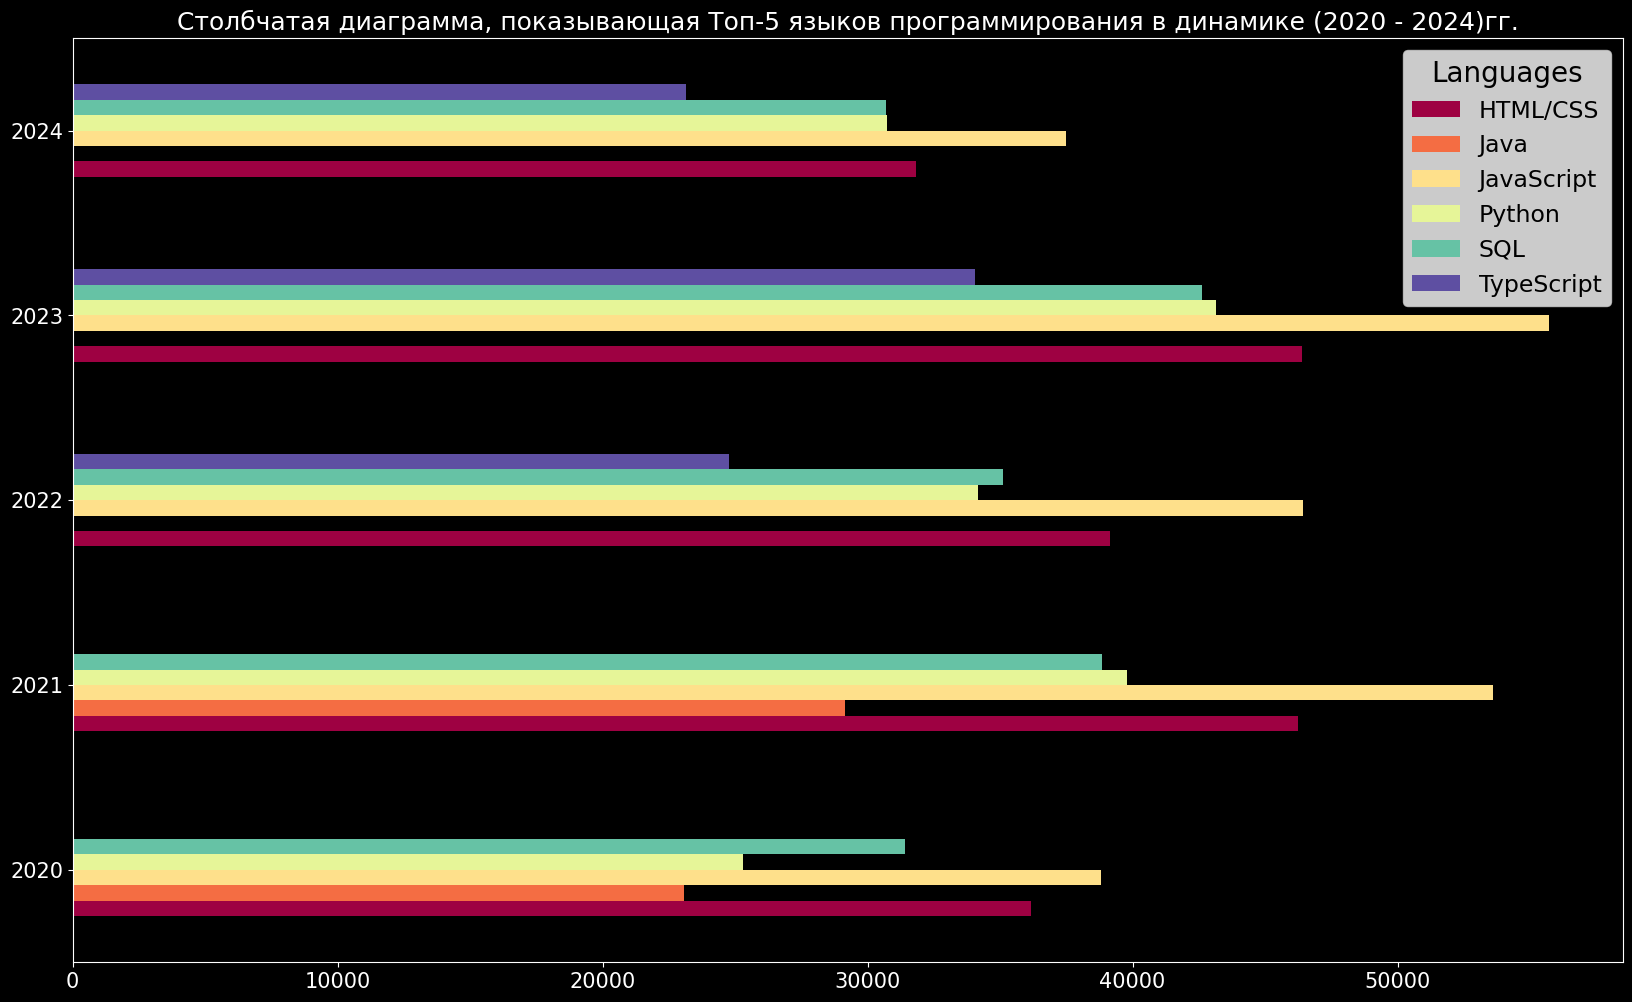

In [256]:
with plt.style.context('dark_background'):
    p = (pivot2
         .plot.barh(figsize=(20,12),
                cmap='Spectral',
                fontsize=15)
    )

plt.ylabel('')
plt.legend(fontsize=17, title='Languages', title_fontsize=20)
plt.title('Столбчатая диаграмма, показывающая Топ-5 языков программирования в динамике (2020 - 2024)гг.',
         fontsize=18)

f = p.get_figure()
plt.show()

**JavaScript** всегда был лидером среди языков программирования.<br> За ним всегда следовал **HTML/CSS**.<br> **Python** и **SQL** периодически делили между собой 3-е и 4-е место.<br>**Java** входил в Топ-5 в 2020 и 2021, а начиная с 2022 его вытеснил **TypeScript**.